# 使用ggplot2进行图形化沟通

第一章就是关于ggplot2绘图的，这里还是关于ggplot2，不过和前面不一样。

此外这里需要安装ggrepel和viridis包。

In [1]:
library(tidyverse)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## 标签

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


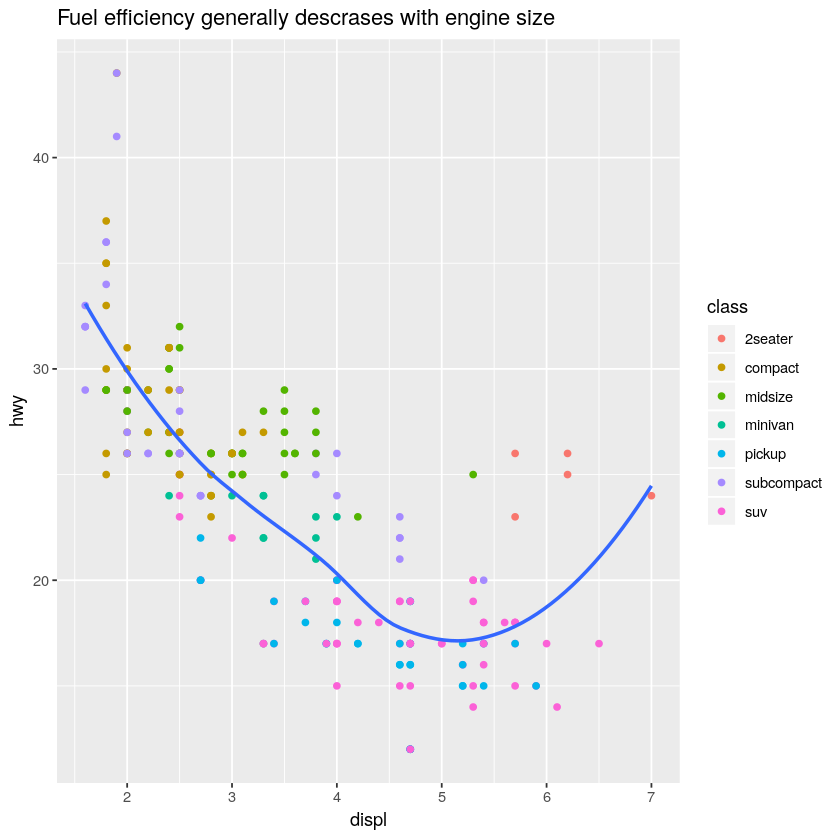

In [2]:
ggplot(mpg, aes(displ, hwy)) + geom_point(aes(color = class)) +
geom_smooth(se = F) + labs(
    title = paste("Fuel efficiency generally descrases with",
                 "engine size"
                 )
)# 书上有点小错误

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


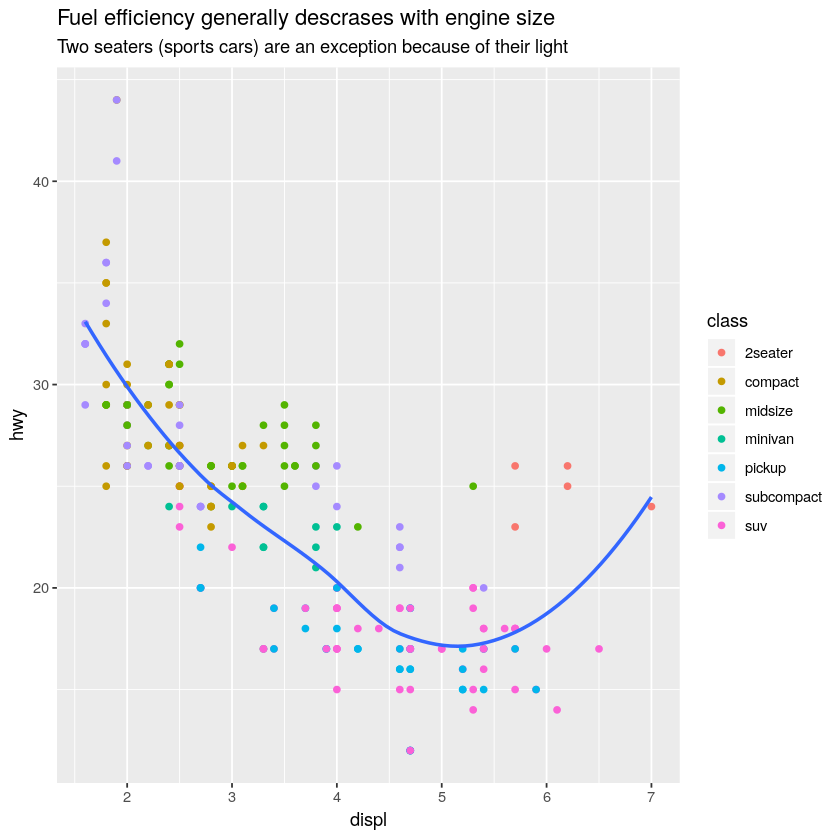

In [3]:
ggplot(mpg, aes(displ, hwy)) + geom_point(aes(color = class)) +
geom_smooth(se = F) + labs(
    title = paste("Fuel efficiency generally descrases with",
                 "engine size"
                 ),
    subtitle = paste(# 添加子标题
        "Two seaters (sports cars) are an exception",
        "because of their light")
)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


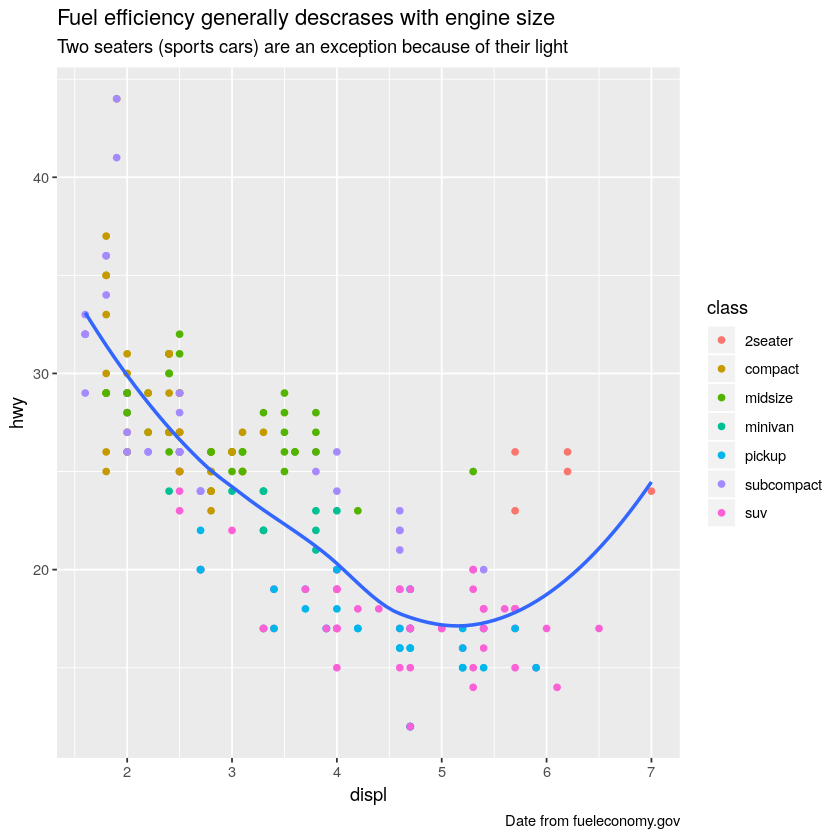

In [4]:
ggplot(mpg, aes(displ, hwy)) + geom_point(aes(color = class)) +
geom_smooth(se = F) + labs(
    title = paste("Fuel efficiency generally descrases with",
                 "engine size"
                 ),
    subtitle = paste(# 添加子标题
        "Two seaters (sports cars) are an exception",
        "because of their light"),
    caption = "Date from fueleconomy.gov"# 右下角添加数据来源
)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


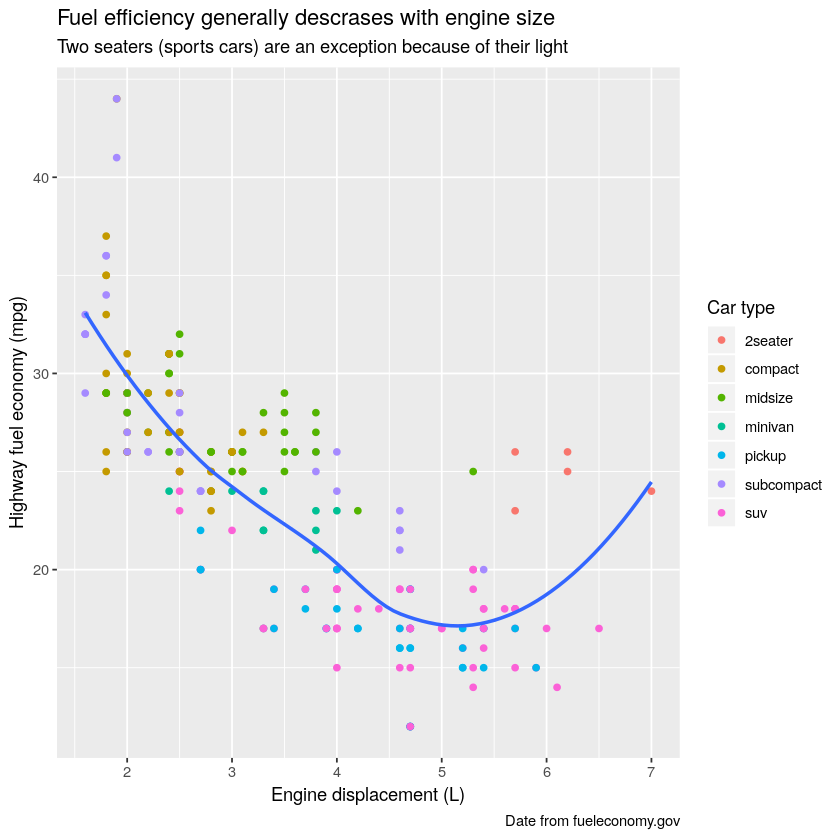

In [5]:
ggplot(mpg, aes(displ, hwy)) + geom_point(aes(color = class)) +
geom_smooth(se = F) + labs(
    title = paste("Fuel efficiency generally descrases with",
                 "engine size"
                 ),
    subtitle = paste(# 添加子标题
        "Two seaters (sports cars) are an exception",
        "because of their light"),
    caption = "Date from fueleconomy.gov",# 右下角添加数据来源
    x = "Engine displacement (L)",
    y = "Highway fuel economy (mpg)",# 修改坐标轴
    color = "Car type"# 修改图例
)

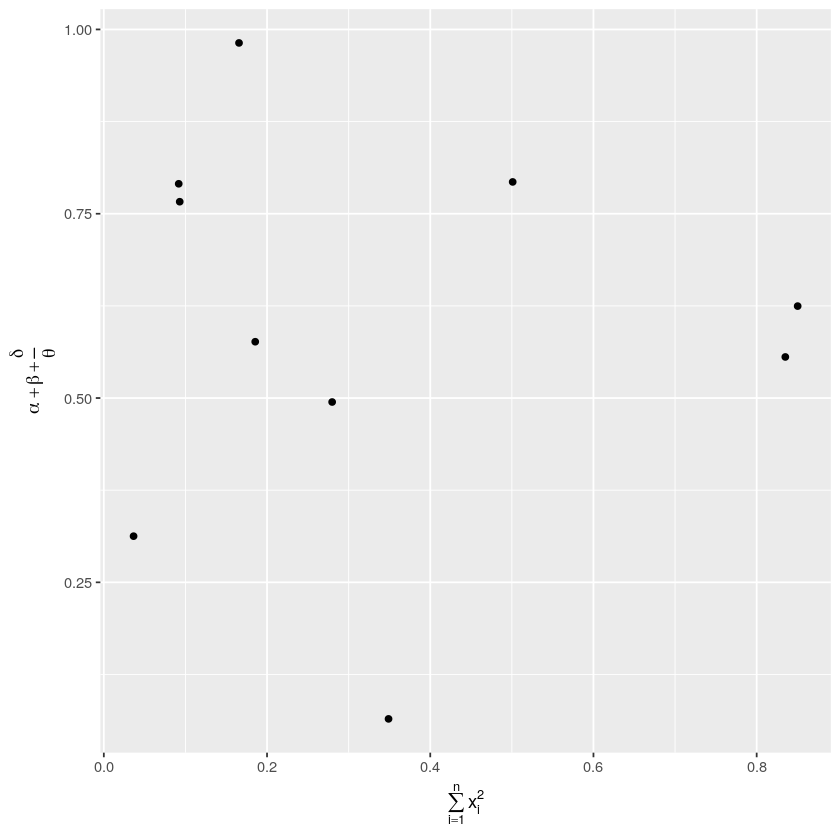

In [6]:
# 使用数学公式
df <- tibble(
    x = runif(10),
    y = runif(10)
)

ggplot(df, aes(x, y)) + geom_point() + 
labs(
    x = quote(sum(x[i] ^ 2, i == 1, n)),
    y = quote(alpha + beta + frac(delta, theta))
)

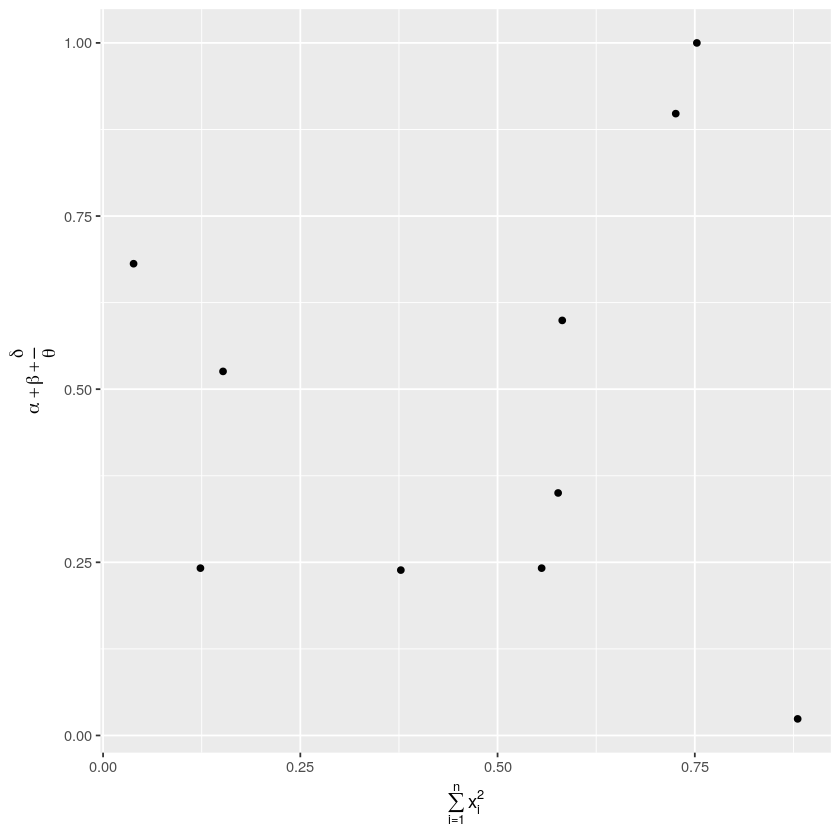

In [7]:
# 使用数学公式
df <- tibble(
    x = runif(10),
    y = runif(10)
)

library(latex2exp)
ggplot(df, aes(x, y)) + geom_point() + 
labs(
    x = TeX("$\\sum_{i=1}^{n} x_i^2$"),
    y = TeX("$\\alpha + \\beta + \\frac{\\delta}{\\theta}$")
)# 这里使用TeX语法写的公式，需要安装latex2exp包

## 注释

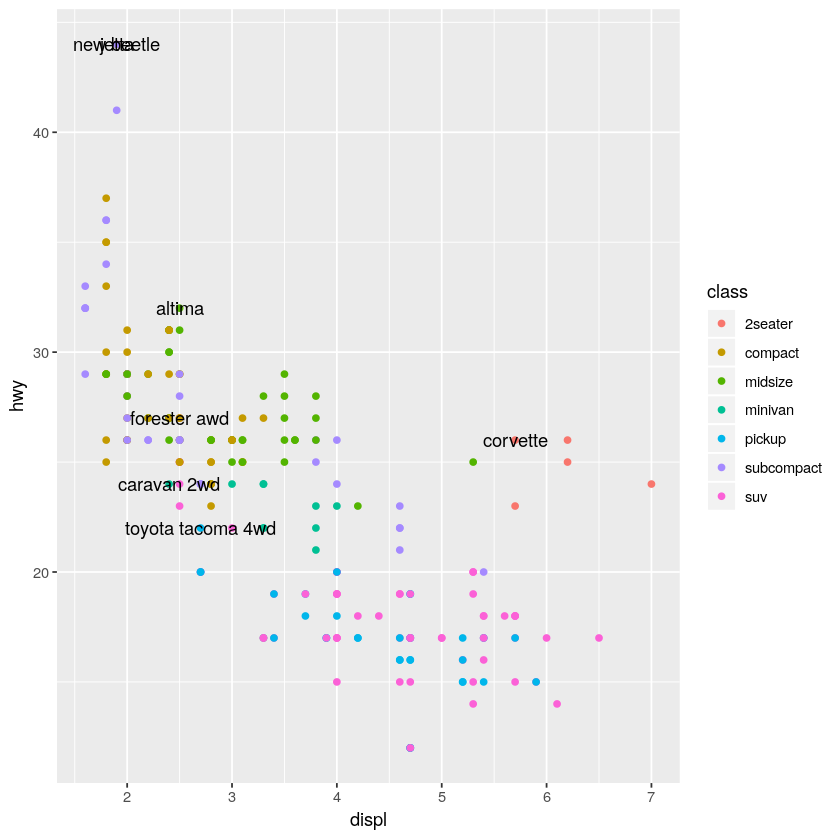

In [8]:
# geom_text版

best_in_class <- mpg %>% group_by(class) %>%
    filter(row_number(desc(hwy)) == 1)

ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = class)) + 
    geom_text(aes(label = model), data = best_in_class)

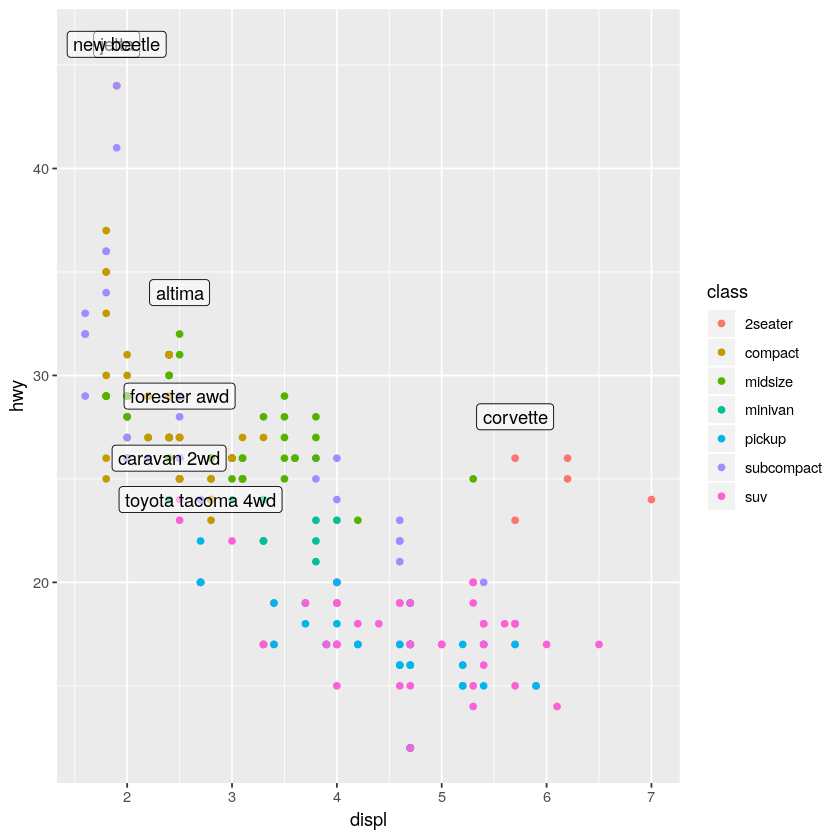

In [9]:
# geom_label版
ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = class)) + 
    geom_label(
        aes(label = model),
        data = best_in_class,
        nudge_y = 2,
        alpha = 0.5
    )

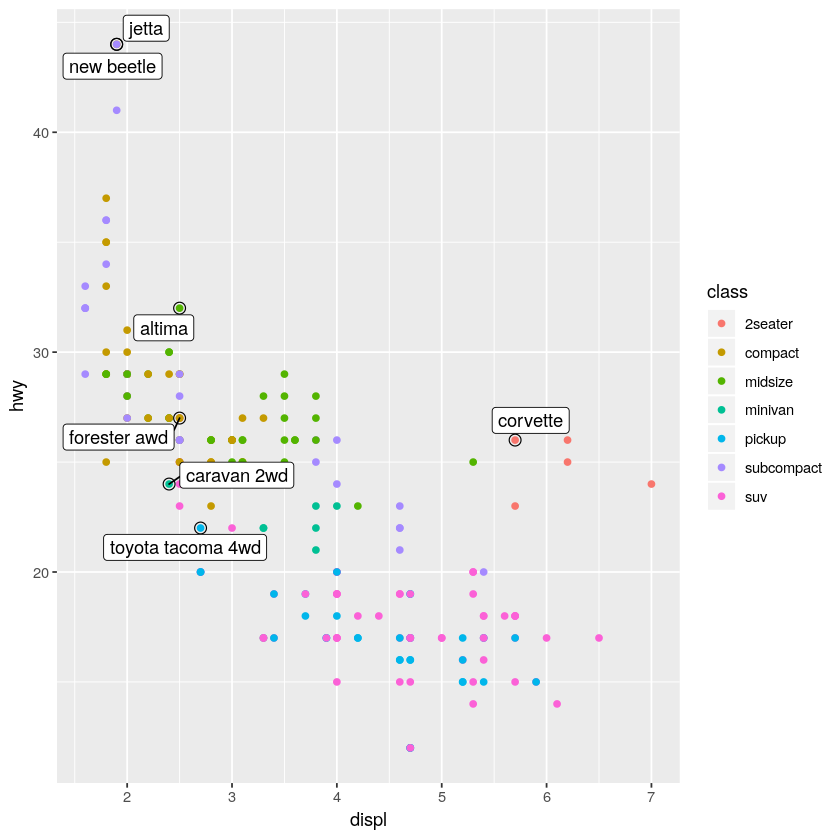

In [10]:
# 利用ggrepel包
ggplot(mpg, aes(displ,  hwy)) + 
    geom_point(aes(color = class)) + 
    geom_point(size = 3, shape = 1, data = best_in_class) + 
    ggrepel::geom_label_repel(
        aes(label = model),
        data = best_in_class
    )

终于不重叠了

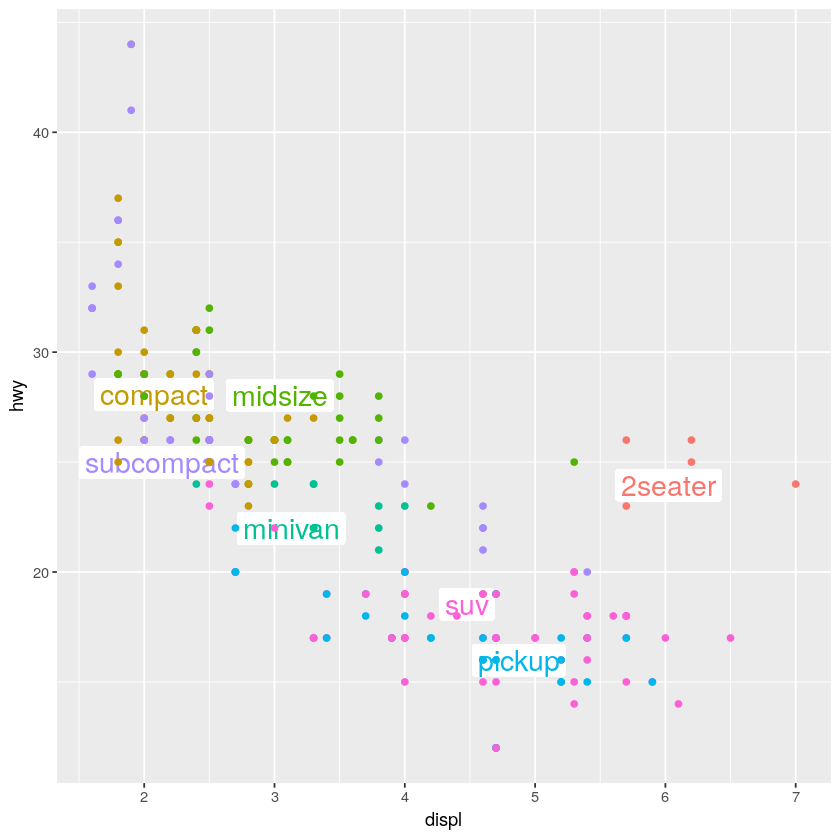

In [11]:
# 将标签直接放在图上以代替图列
class_avg <- mpg %>% group_by(class) %>%
    summarise(
        displ = median(displ),
        hwy = median(hwy)
    )
ggplot(mpg, aes(displ, hwy, color = class)) + 
    ggrepel::geom_label_repel(aes(label = class),
        data = class_avg,
        size = 6,
        label.size = 0,
        segment.color = NA
    ) + 
geom_point() + 
theme(legend.position = "none")

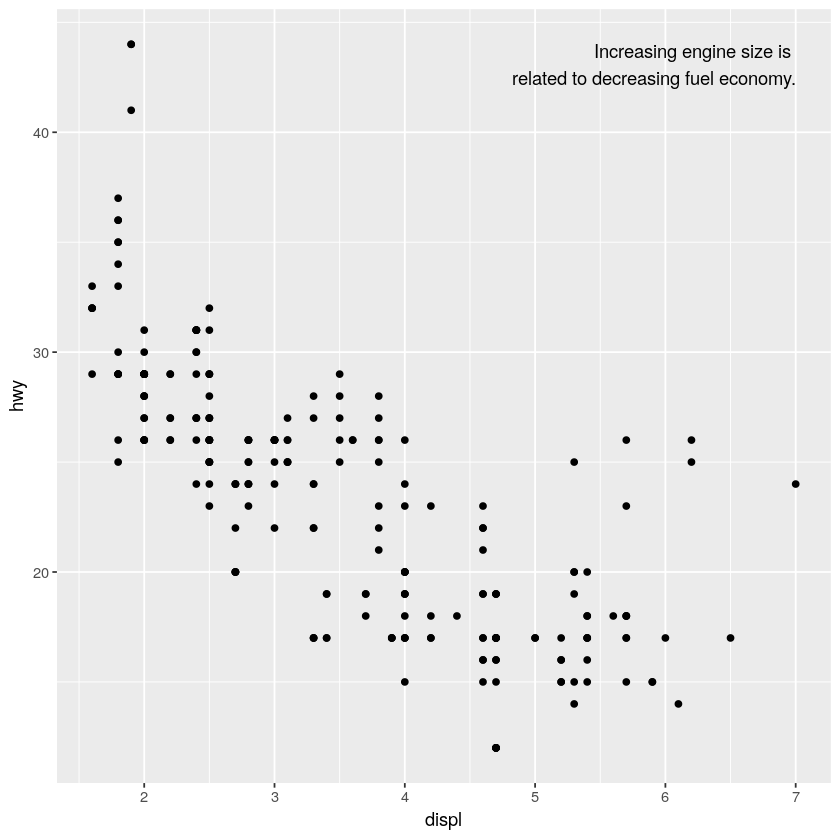

In [12]:
# 添加位于角落的单独标签
label <- mpg %>% 
    summarise(
        displ = max(displ),
        hwy = max(hwy),
        label = paste(
            "Increasing engine size is \nrelated to",
            "decreasing fuel economy."
        )
    )
ggplot(mpg, aes(displ, hwy)) + 
    geom_point() + 
    geom_text(
        aes(label = label),
        data = label,
        vjust = "top",
        hjust = "right"# 右对齐
    )

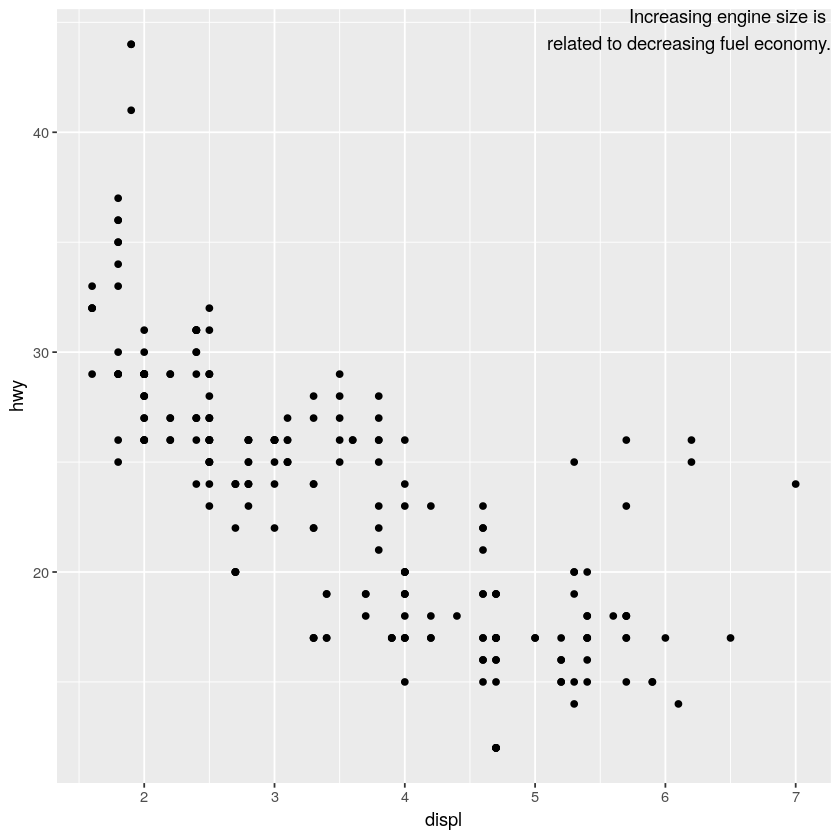

In [13]:
# 添加位于右上角的单独标签
label <- mpg %>% 
    summarise(
        displ = Inf,
        hwy = Inf,
        label = paste(
            "Increasing engine size is \nrelated to",
            "decreasing fuel economy."
        )
    )
ggplot(mpg, aes(displ, hwy)) + 
    geom_point() + 
    geom_text(
        aes(label = label),
        data = label,
        vjust = "top",
        hjust = "right"# 右对齐
    )

In [14]:
# 使用stringr::str_wrap()函数来自动换行
"Increasing engine size related to decreasing fuel economy."%>%  
stringr::str_wrap(width =40) %>%
writeLines() 

Increasing engine size related to
decreasing fuel economy.


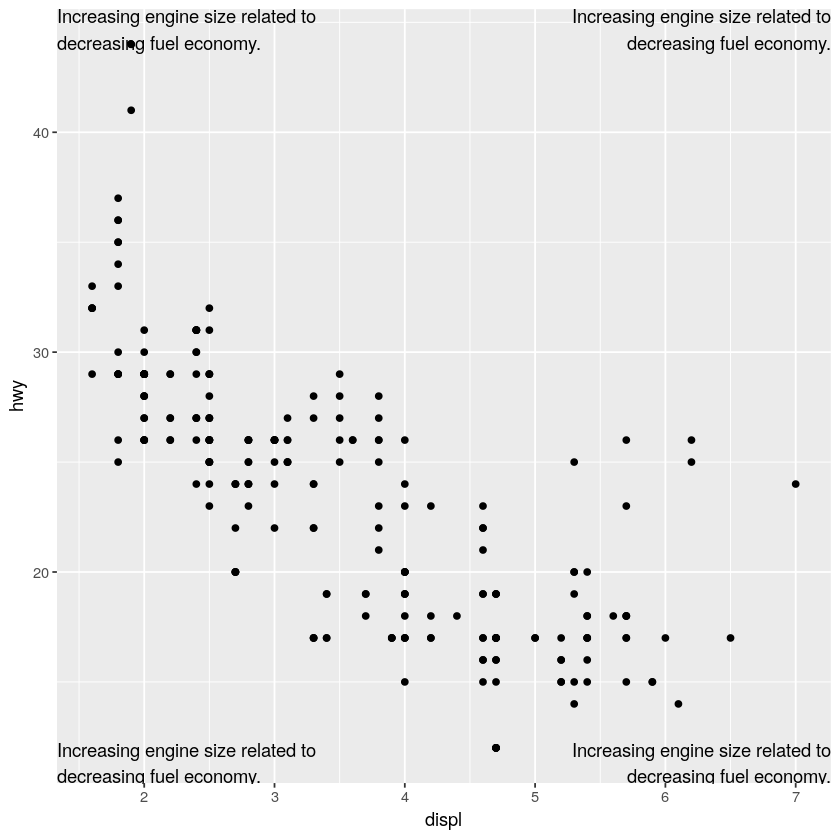

In [15]:
# 使用geom_text()函数和无穷大参数值将文本标签放置在图形的4个角落。
label2 <- tibble(        
        displ = c(Inf,Inf,-Inf,-Inf),
        hwy = c(-Inf,Inf,Inf,-Inf),
        vjust = c("bottom","top","top","bottom"),
        hjust = c("right","right","left","left"),
        label = "Increasing engine size related to decreasing fuel economy."%>%  
            stringr::str_wrap(width =40) 
    )

vjust = c("bottom","top","top","bottom")
hjust = c("right","right","left","left")

ggplot(mpg, aes(displ, hwy)) + 
    geom_point() + 
    geom_text(
        aes(label = label),
        data = label2,
        vjust = vjust,
        hjust = hjust
    ) 

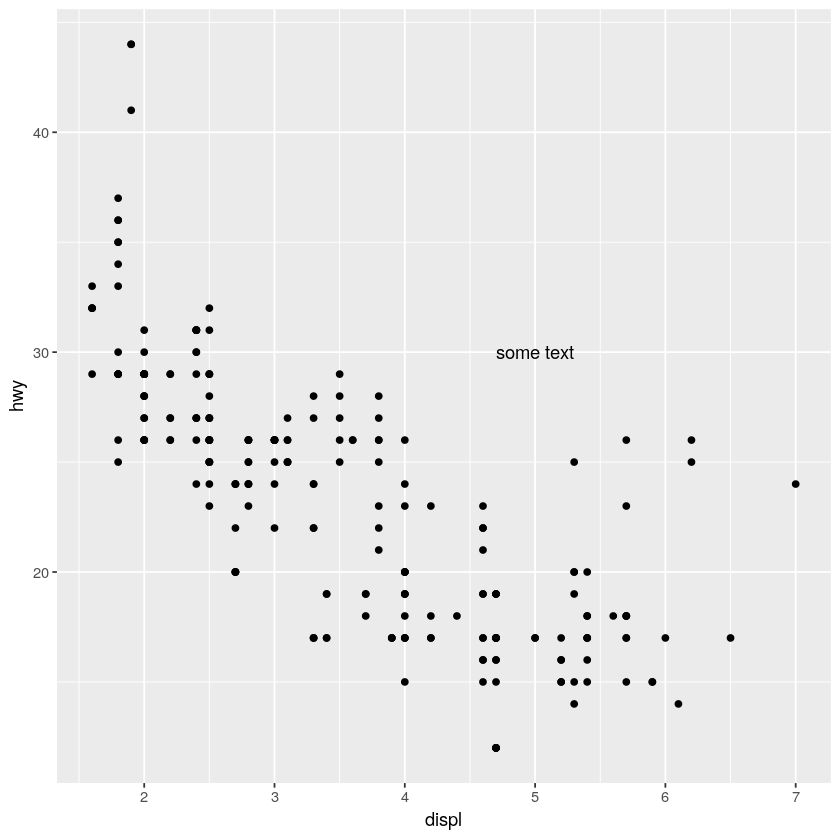

In [16]:
# 阅读annotate()函数的文档。不创建tibble的情况下，如何使用这个函数为图形添加一个文本标签？
ggplot(mpg, aes(displ, hwy)) + 
    geom_point() + 
    annotate("text", x = 5, y = 30, label = "some text")
# 详细看帮助，可以添加文本和形状，通过绝对位置添加

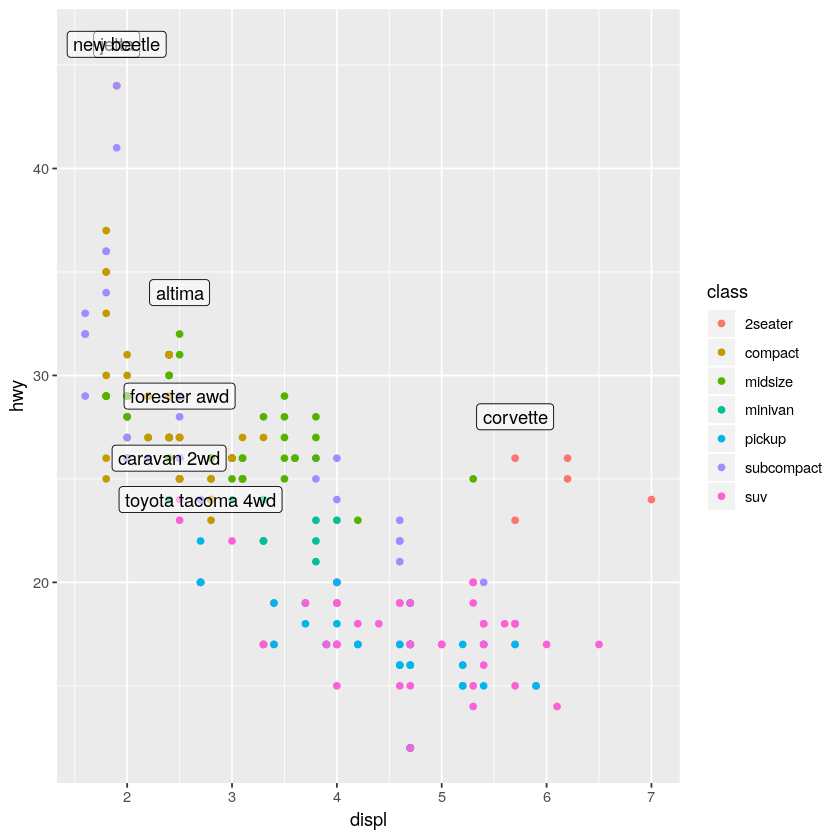

In [17]:
ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = class)) + 
    geom_label(
        aes(label = model),
        data = best_in_class,
        nudge_y = 2,
        alpha = 0.5
    )

## 标度

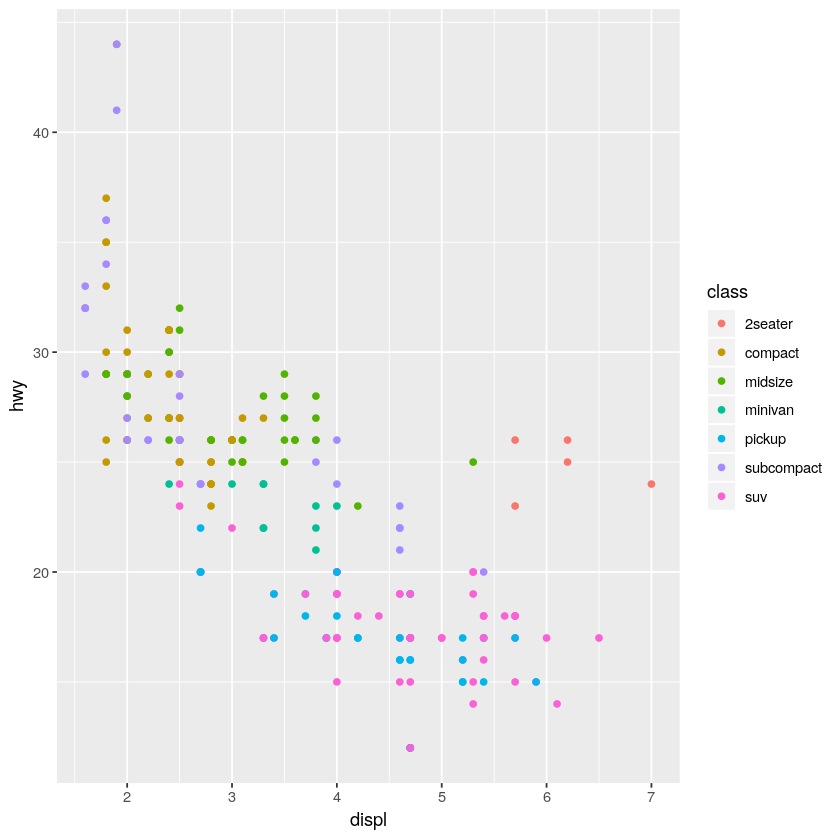

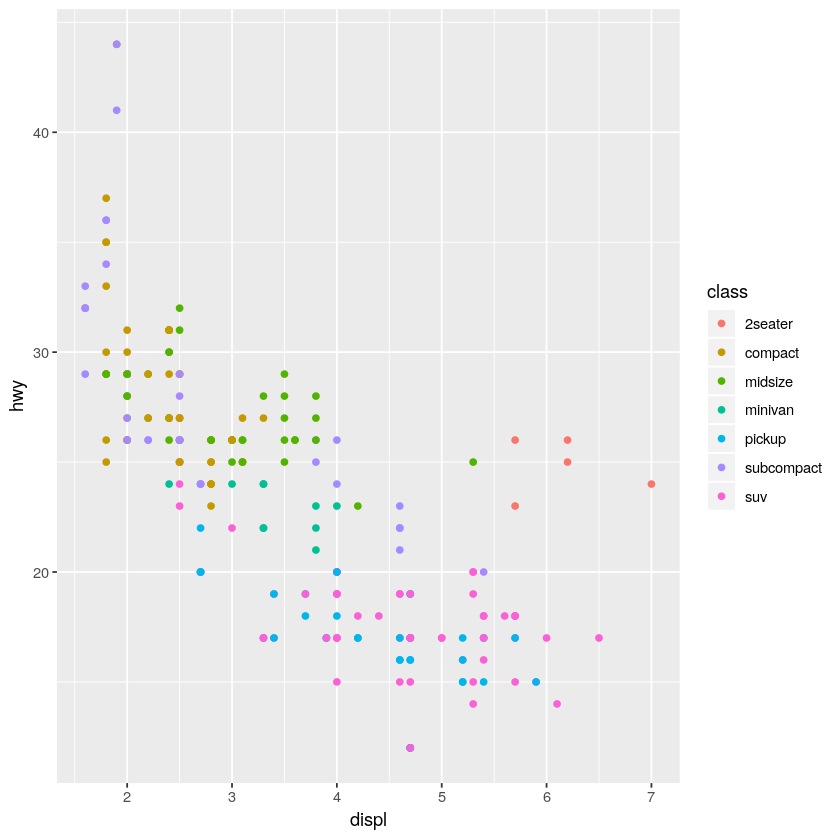

In [18]:
# 一般情况下，ggplot2会自动向图表中添加标度。
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = class))
# 等于下面的
ggplot(mpg, aes(displ, hwy)) +
geom_point(aes(color = class)) +
scale_x_continuous() +
scale_y_continuous() +
scale_color_discrete()

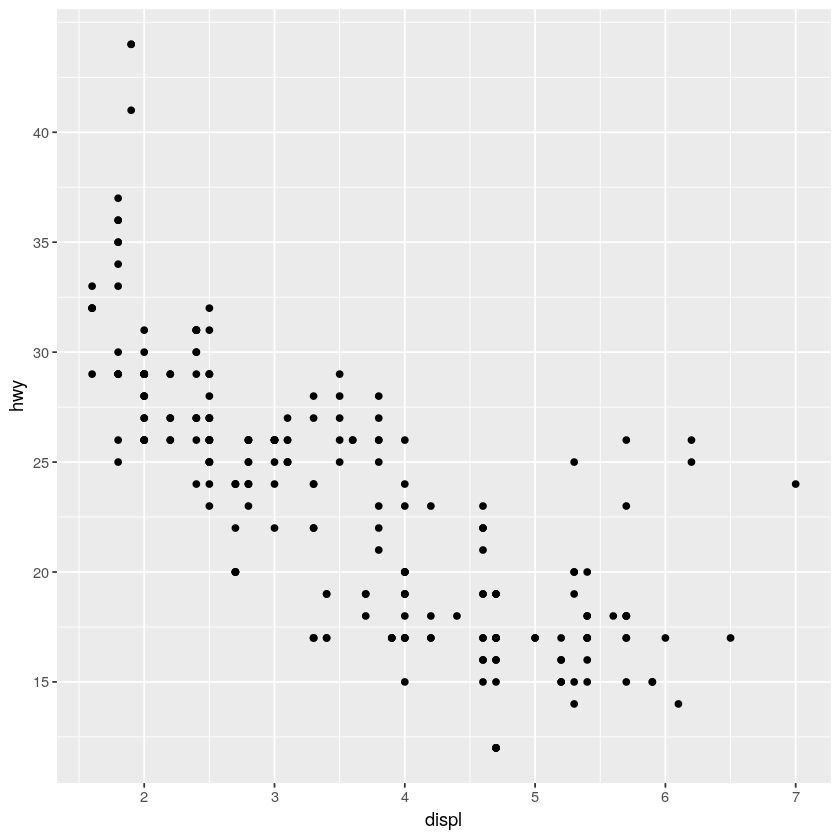

In [19]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point() +
    scale_y_continuous(breaks =seq(15, 40, by =5))
# 设置Y轴标度

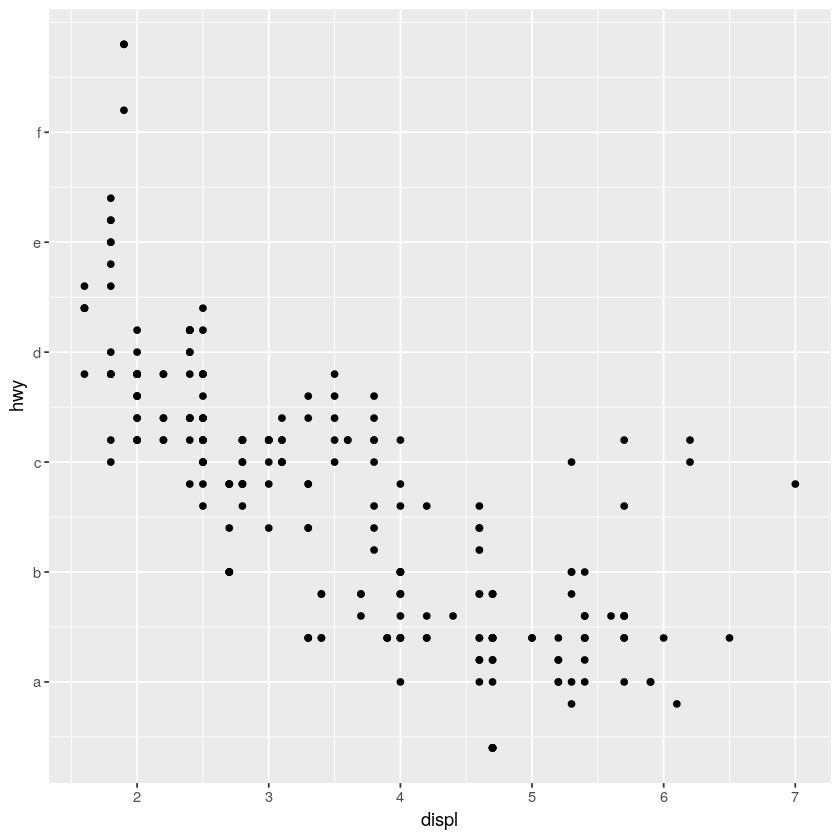

In [20]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point() +
    scale_y_continuous(breaks =seq(15, 40, by =5), labels = letters[1:6])
# 利用labels将数值标度改为字母

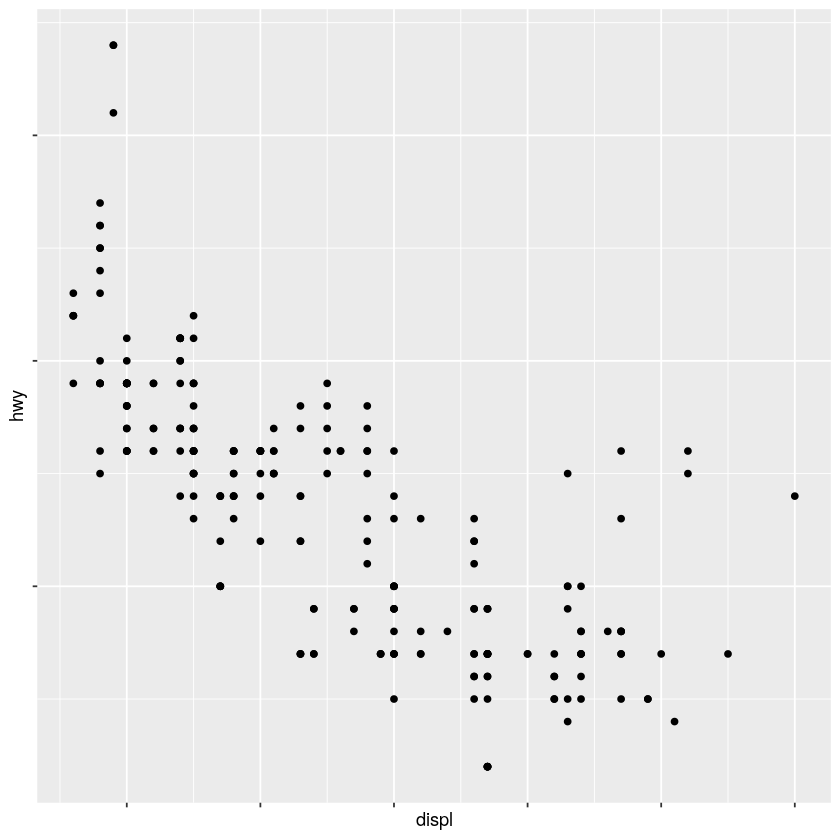

In [21]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point() +
    scale_x_continuous(labels =NULL) +
    scale_y_continuous(labels =NULL)
# 将labels设置为NULL，这样可以不显示刻度标签

name,start,end,party
<chr>,<date>,<date>,<chr>
Eisenhower,1953-01-20,1961-01-20,Republican
Kennedy,1961-01-20,1963-11-22,Democratic
Johnson,1963-11-22,1969-01-20,Democratic
Nixon,1969-01-20,1974-08-09,Republican
Ford,1974-08-09,1977-01-20,Republican
Carter,1977-01-20,1981-01-20,Democratic


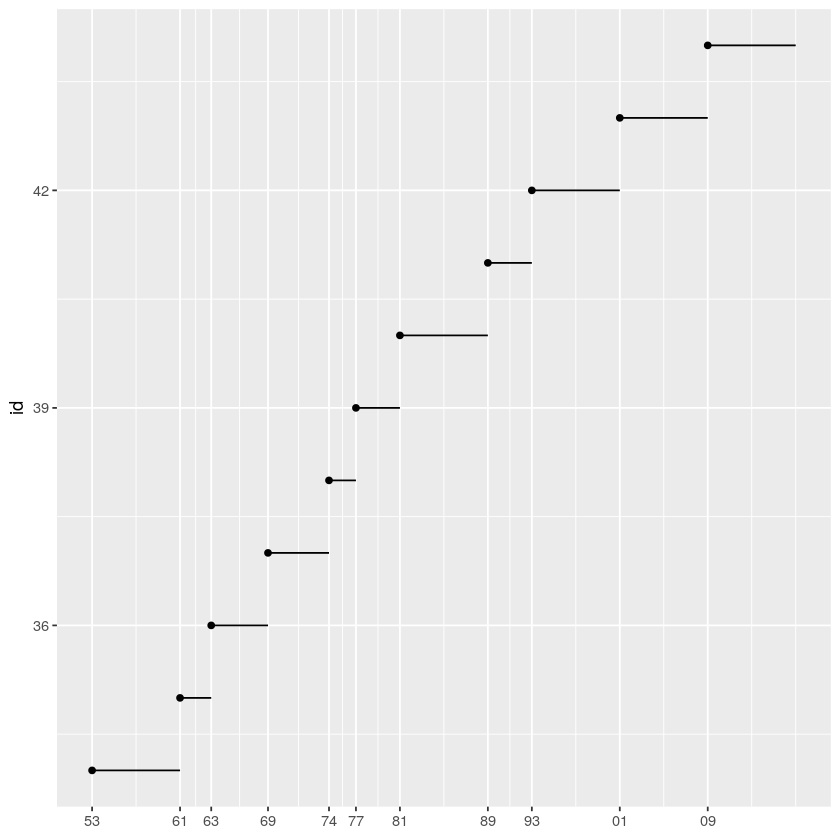

In [22]:
presidential %>% head()
# 不熟悉的数据先看一下
presidential %>% mutate(id = 33 + row_number()) %>% 
ggplot(aes(start, id)) +
    geom_point() +
    geom_segment(aes(xend = end, yend = id)) +
    scale_x_date(
        NULL,
        breaks = presidential$start,
        date_labels = "%y"
        # 以2位显示年份，大写Y以4位显示年份，可以看前面关于时间日期的格式化
    )

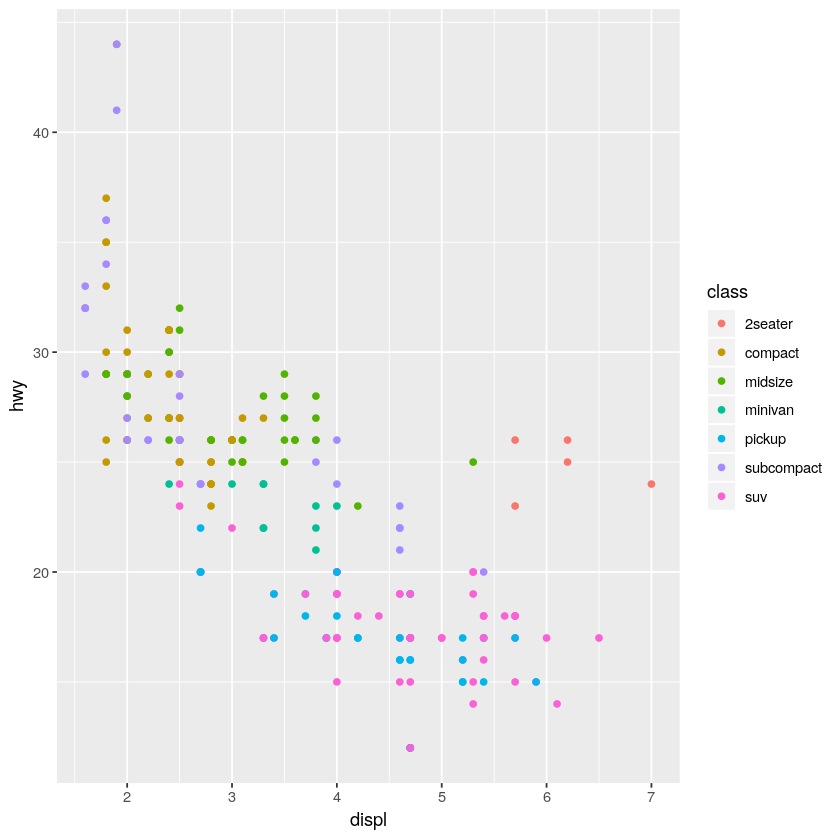

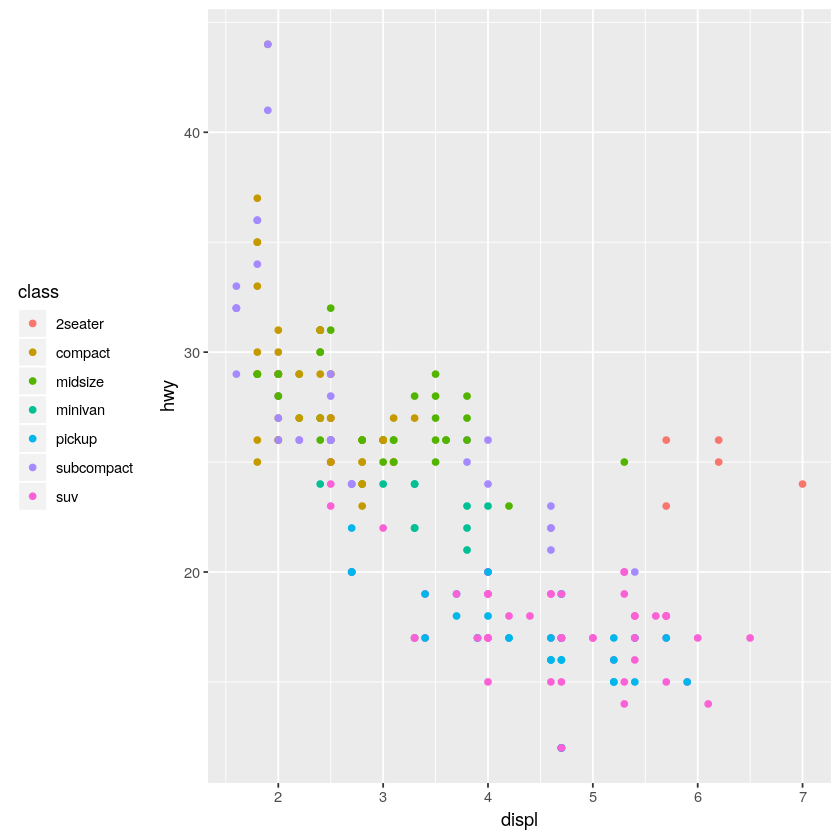

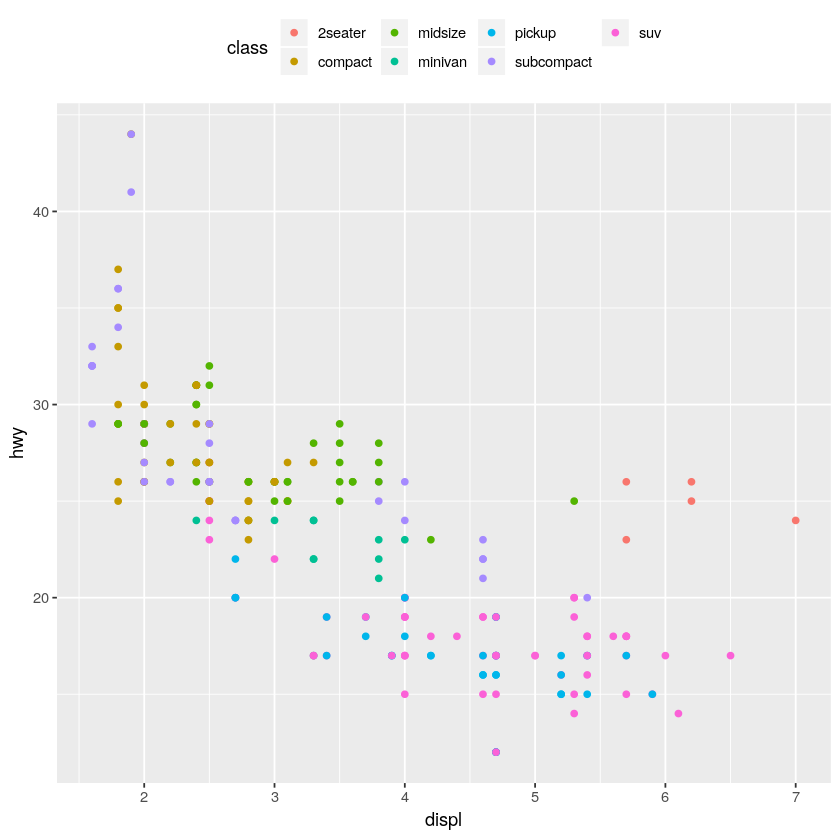

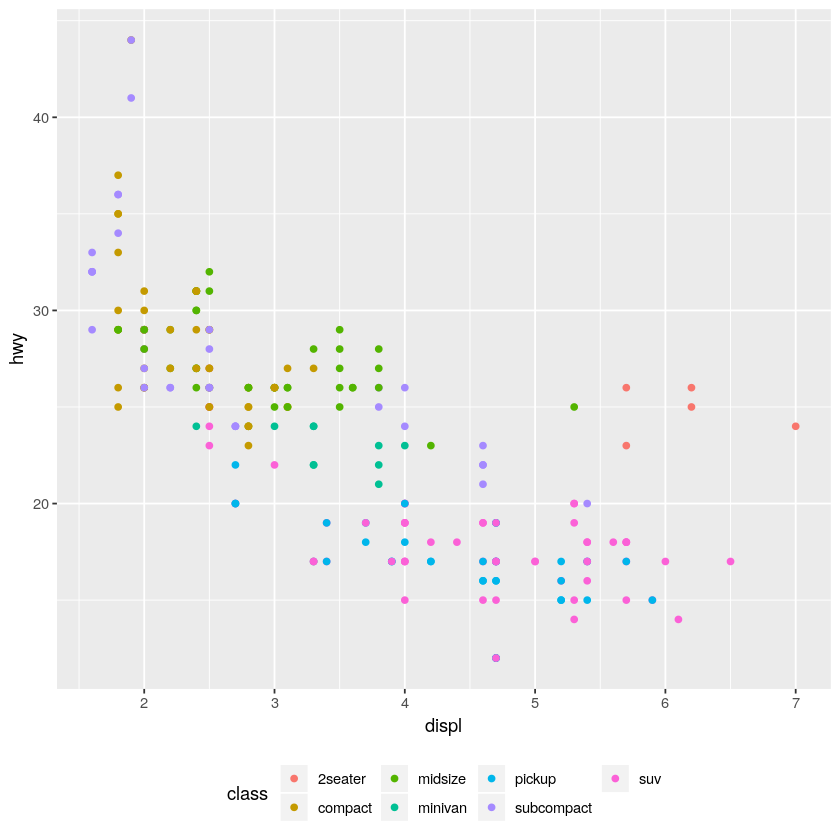

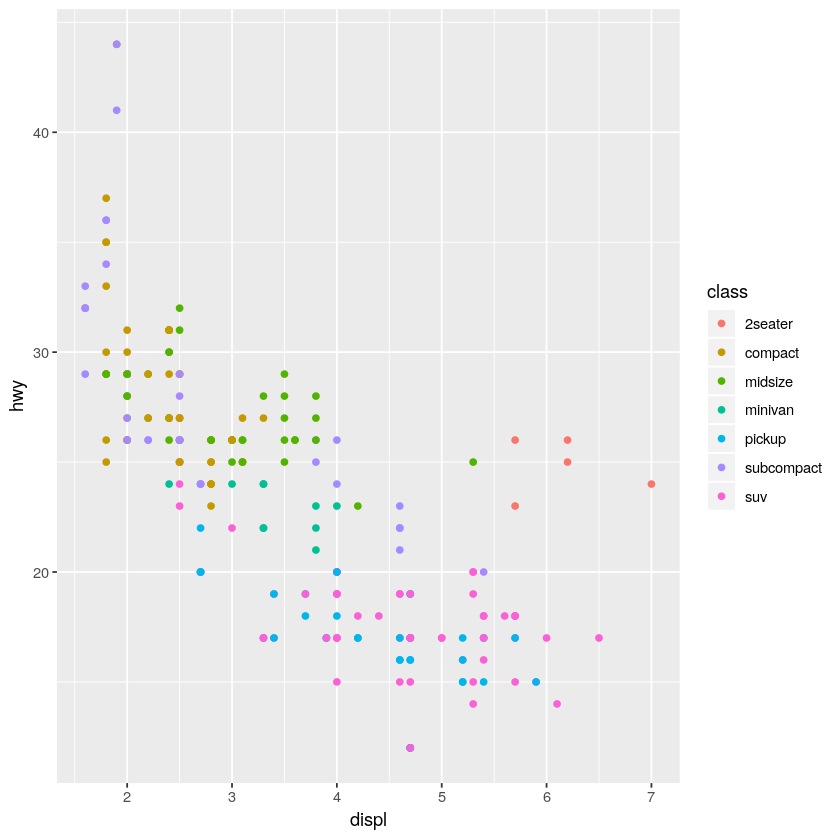

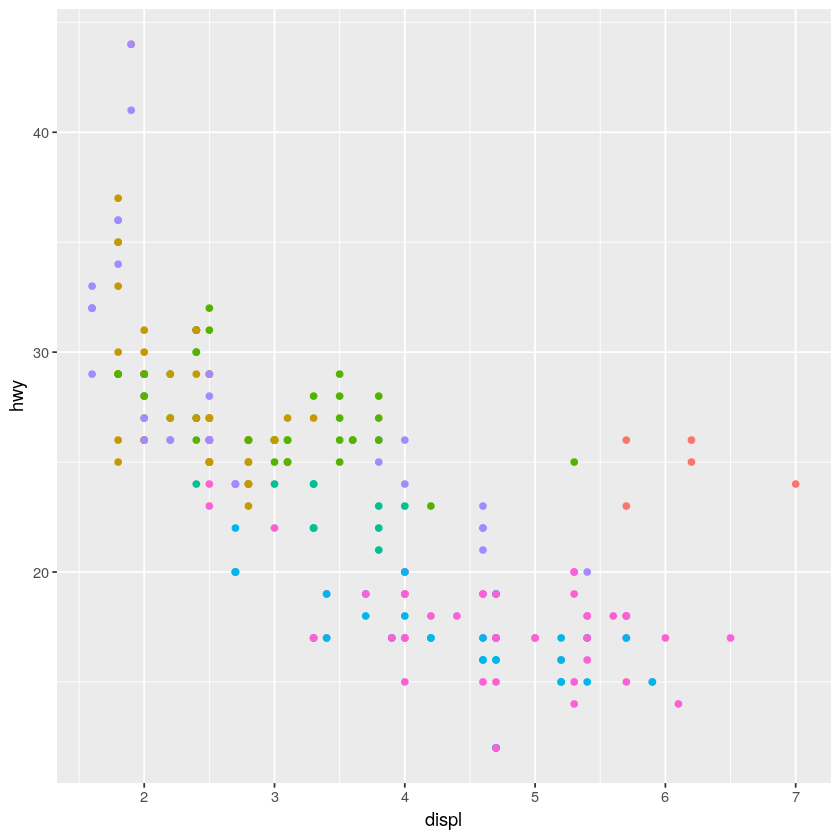

In [23]:
# 图例布局
# 使用theme函数
base <-ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = class))
base
base +theme(legend.position ="left") 
base +theme(legend.position ="top") 
base +theme(legend.position ="bottom") 
base +theme(legend.position ="right") # 默认设置
base +theme(legend.position ="none") # 空

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


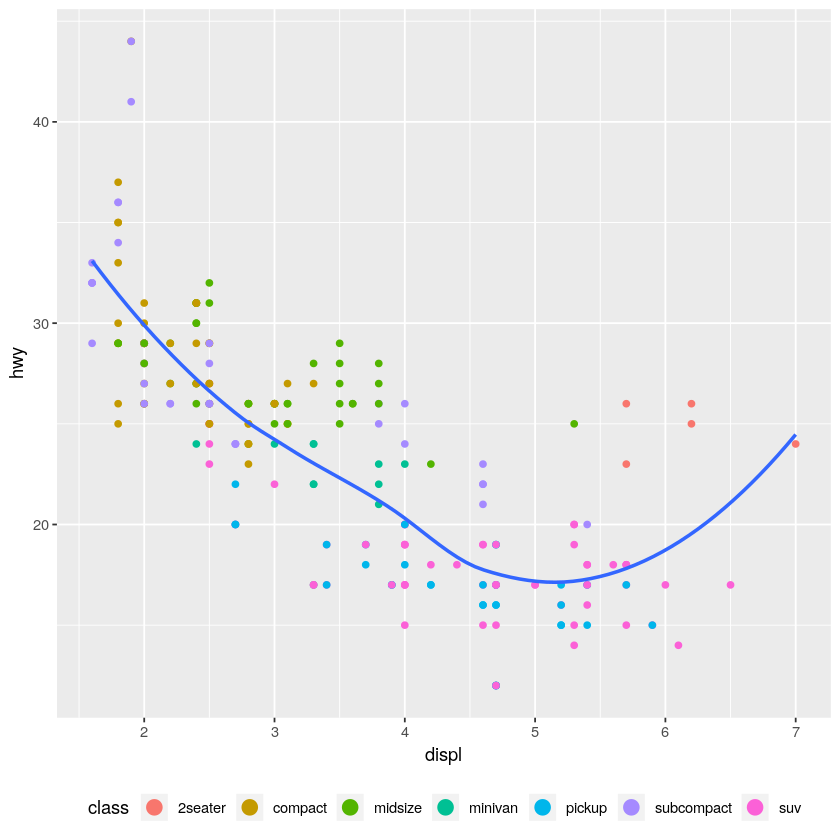

In [24]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = class)) +
    geom_smooth(se =FALSE) +
    theme(legend.position ="bottom") +
    guides(     
        color =guide_legend(       
            nrow =1, # 显示为一行      
            override.aes =list(size =4)# 增大图例数据点
        )   
    )

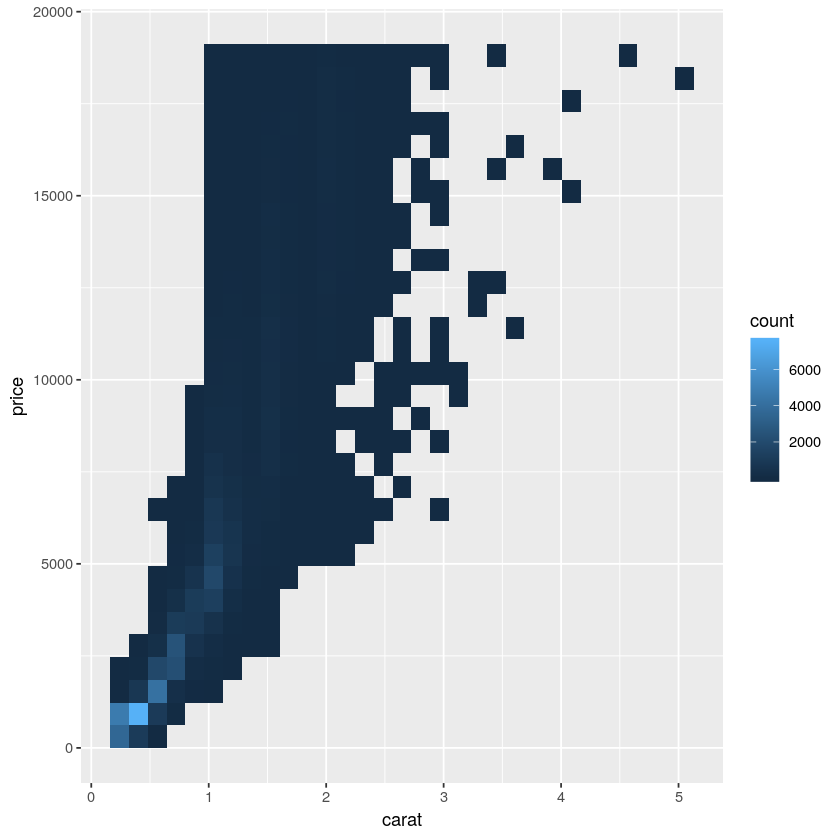

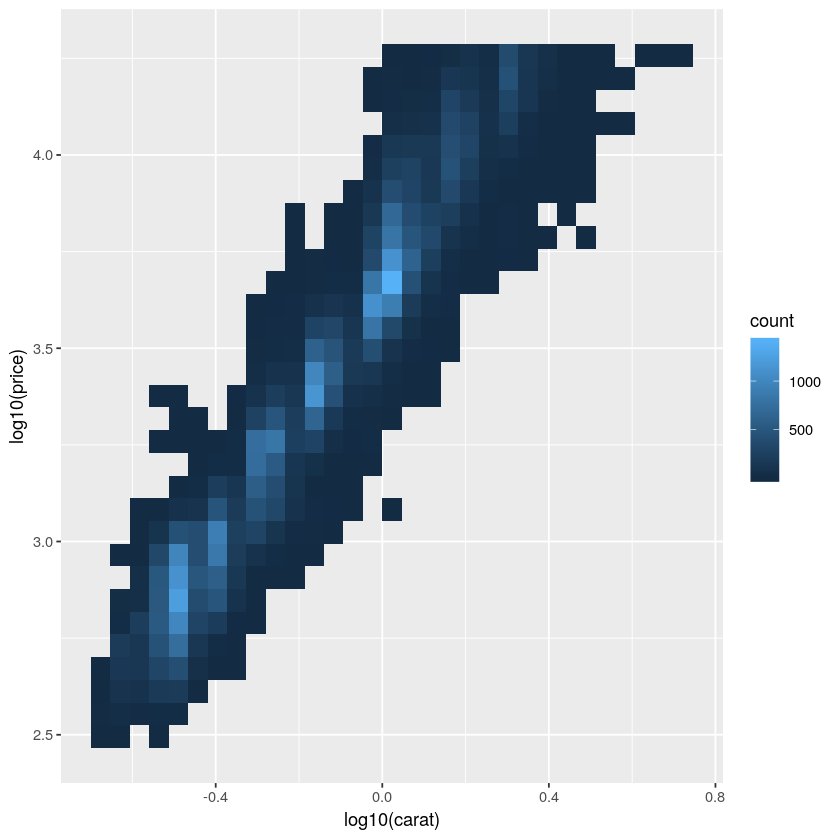

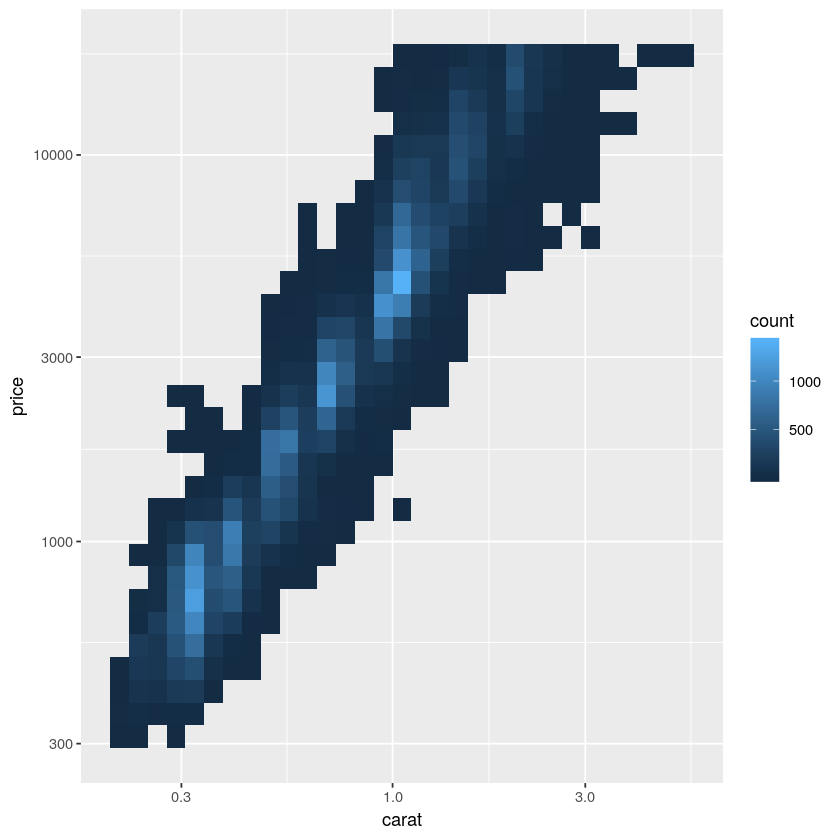

In [25]:
# 标度替换
ggplot(diamonds, aes(carat, price)) +
    geom_bin2d() 
# 看不出关系
ggplot(diamonds, aes(log10(carat), log10(price))) +
    geom_bin2d() 
# 对数转换
# 缺点是坐标轴的值变了

# 标度转换
ggplot(diamonds, aes(carat, price)) +
    geom_bin2d() +
    scale_x_log10() +
    scale_y_log10()

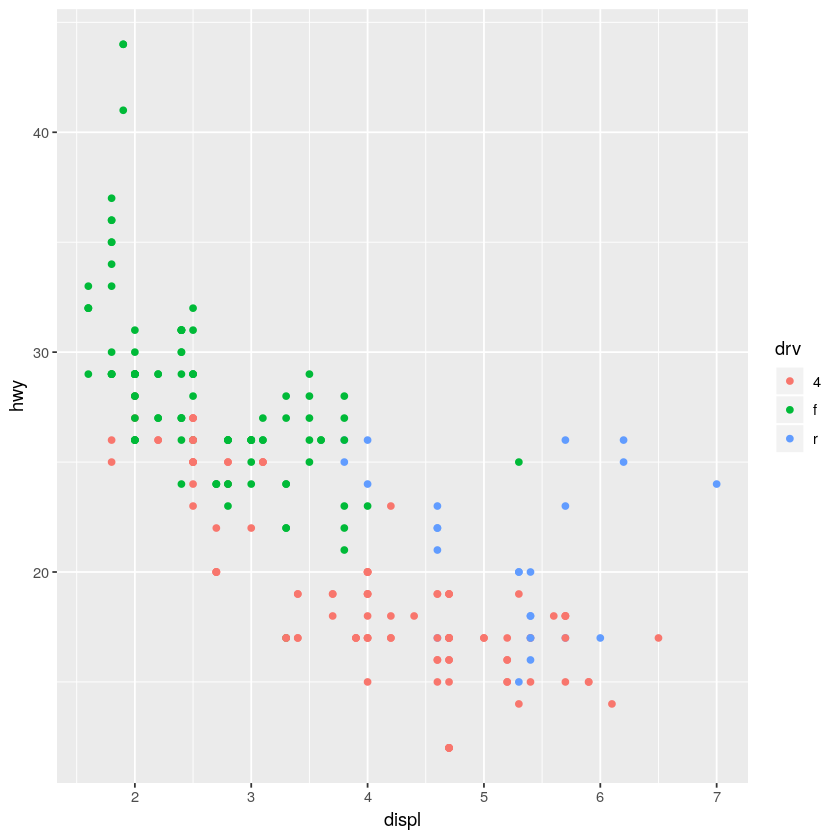

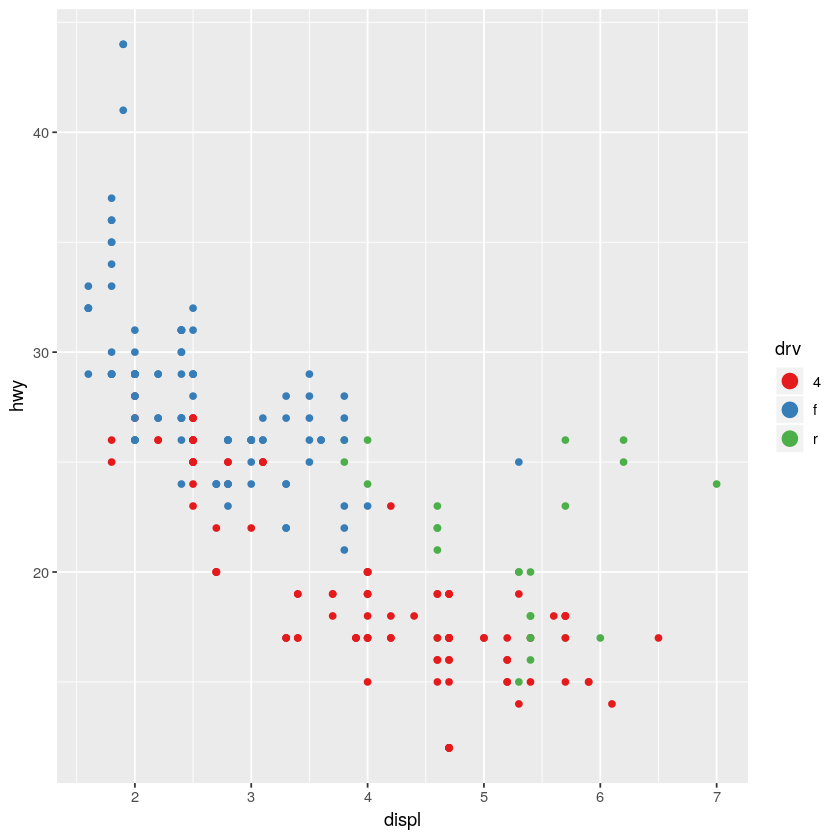

In [26]:
# 定制颜色
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = drv)) 
# 后者颜色对比更强烈
ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = drv)) +
    scale_color_brewer(palette = "Set1") +　# 使用ColorBrewer标度
    guides(     
        color =guide_legend(       
#             ncol =1, # 显示为一行      
            override.aes =list(size =4)# 增大图例数据点
        )
)

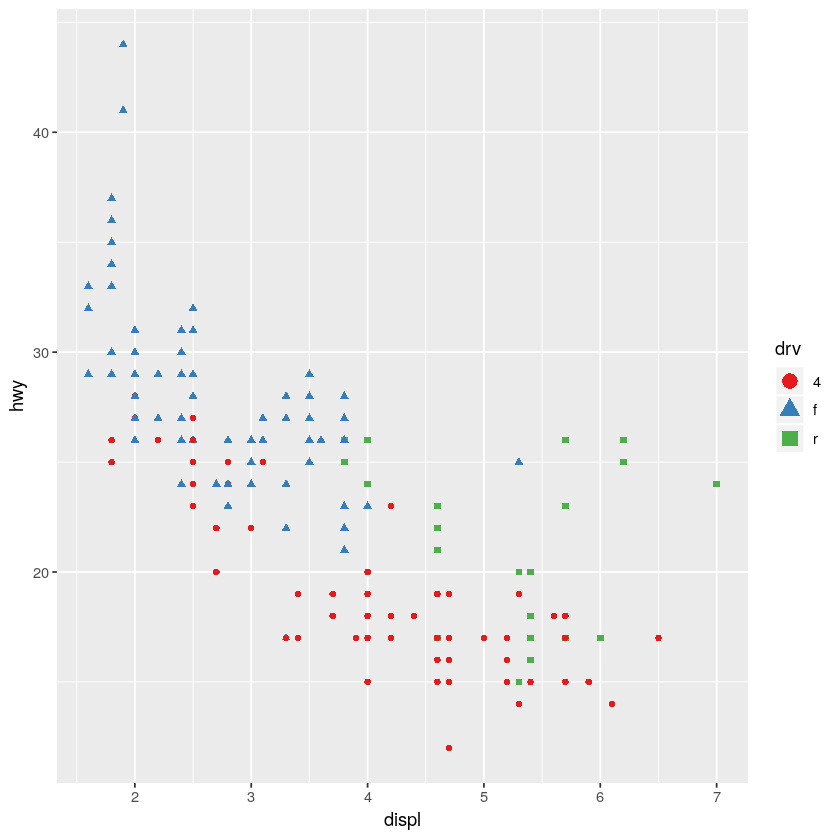

In [27]:

ggplot(mpg, aes(displ, hwy)) + 
    geom_point(aes(color = drv, shape = drv)) + # 添加形状
    scale_color_brewer(palette = "Set1") +　# 使用ColorBrewer标度
    guides(     
        color =guide_legend(       
#             ncol =1, # 显示为一行      
            override.aes =list(size =4)# 增大图例数据点
        )
)

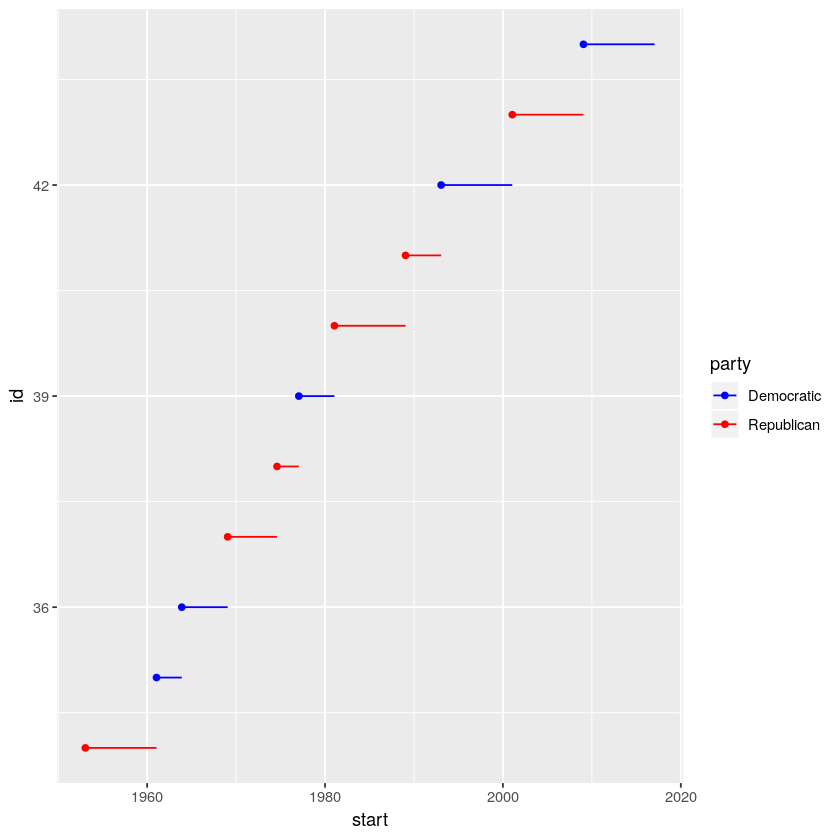

In [28]:
presidential %>%
    mutate(id =33+row_number()) %>%
    ggplot(aes(start, id, color = party)) +
        geom_point() +
        geom_segment(aes(xend = end, yend = id)) +
        scale_colour_manual(       
            values =c(Republican ="red", Democratic ="blue")# 手动指定颜色
        )

对于连续的颜色标度，我们可以使用内置函数scale_color_gradient()或scale_fill_gradient()来表示。如果想要表示发散性的颜色标度，可以使用scale_color_gradient2()函数，它可以使用正数和负数来表示不同的颜色。如果想要区分出位于平均值以上和以下的点，那么这个函数是非常合适的。

另一个可以选用的函数是由viridis包提供的scale_color_viridis()，它是对ColorBrewer分类标度的一种连续模拟

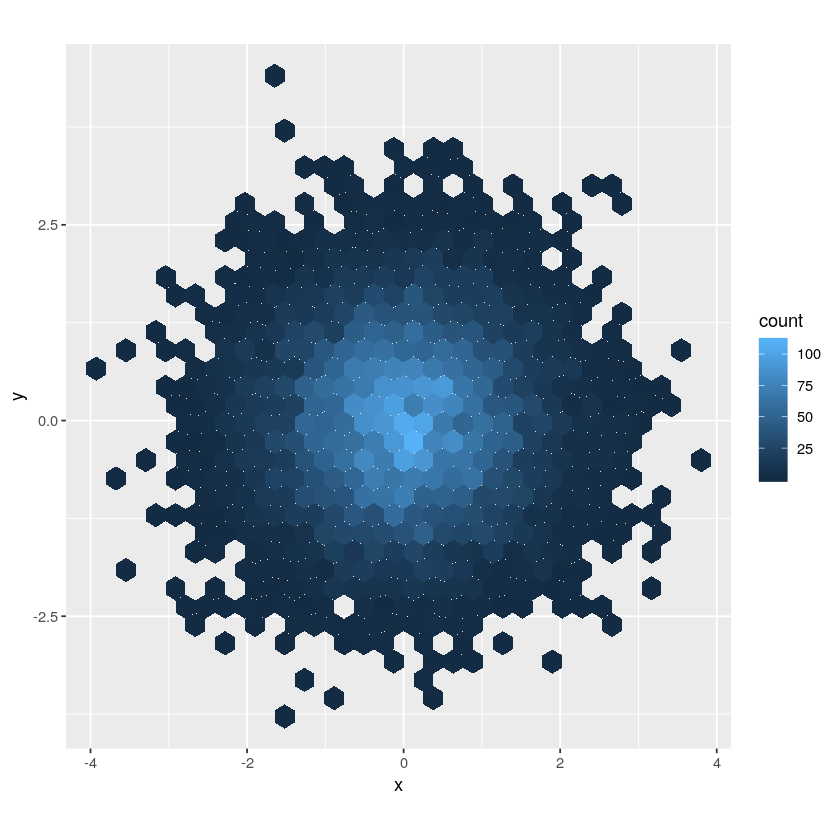

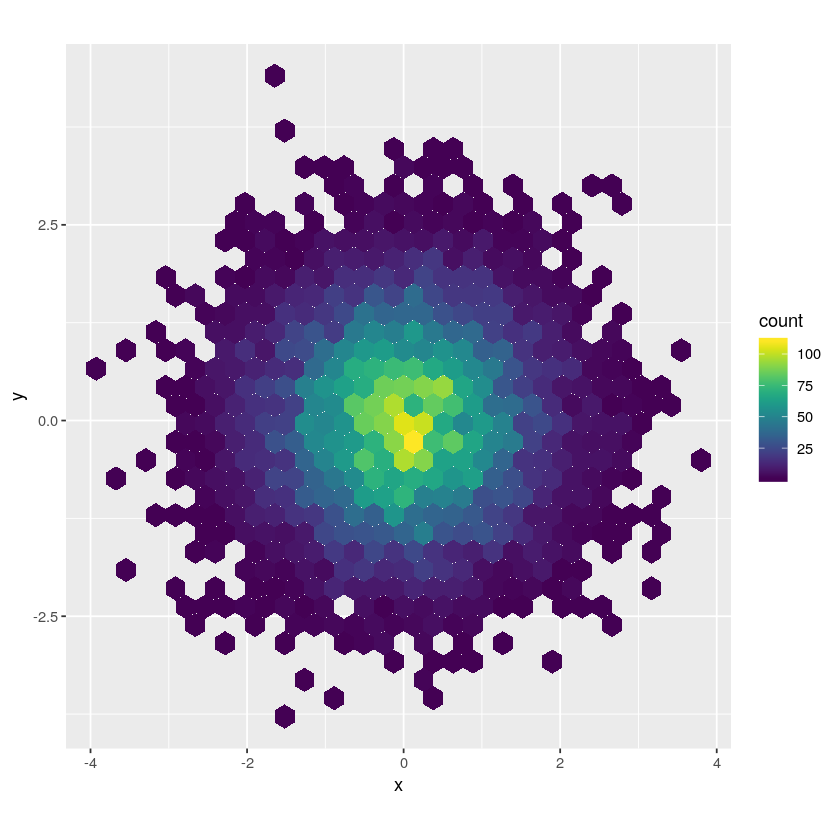

In [29]:
df <-tibble(   
    x =rnorm(10000),   
    y =rnorm(10000) ) 
ggplot(df, aes(x, y)) +
    geom_hex() +
    coord_fixed() # 调纵横比，使其更美观

ggplot(df, aes(x, y)) +
    geom_hex() +  
    viridis::scale_fill_viridis() +
    coord_fixed()

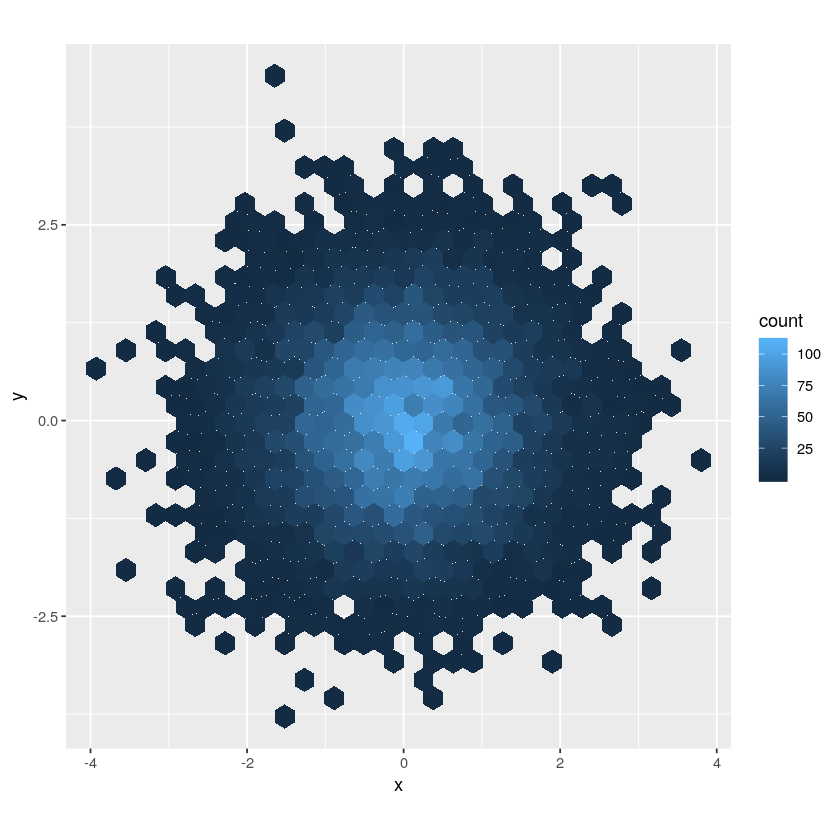

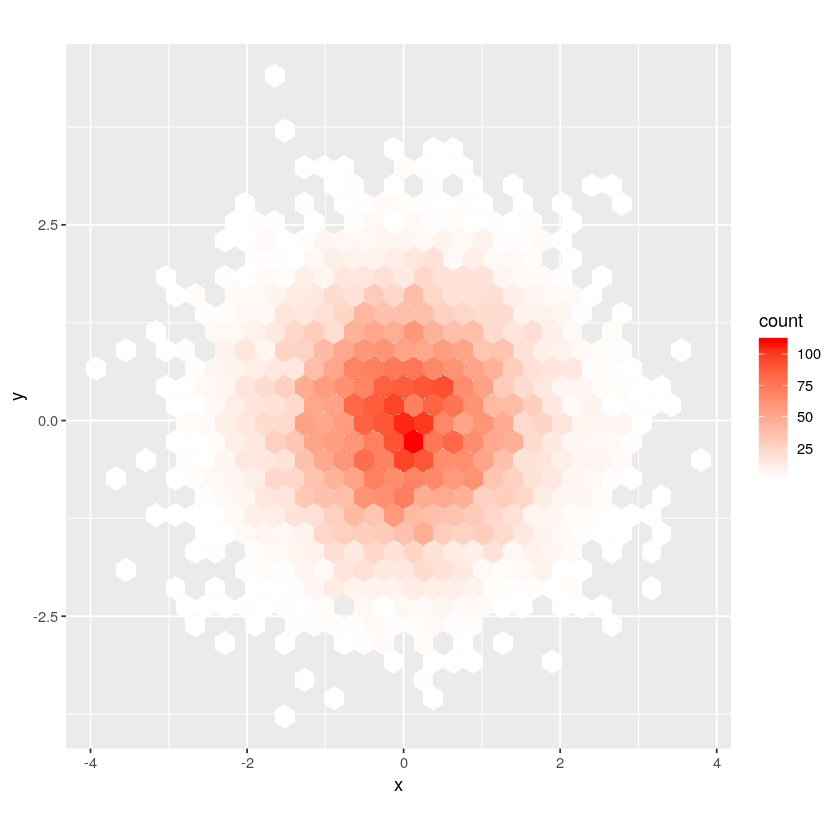

In [30]:
# 为什么以下代码没有覆盖默认标度？
ggplot(df, aes(x, y)) +
geom_hex() +
scale_color_gradient(low ="white", high ="red") +
coord_fixed()

# color设置的是边框，改为fill就覆盖了
ggplot(df, aes(x, y)) +
geom_hex() +
scale_fill_gradient(low ="white", high ="red") +
coord_fixed()


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



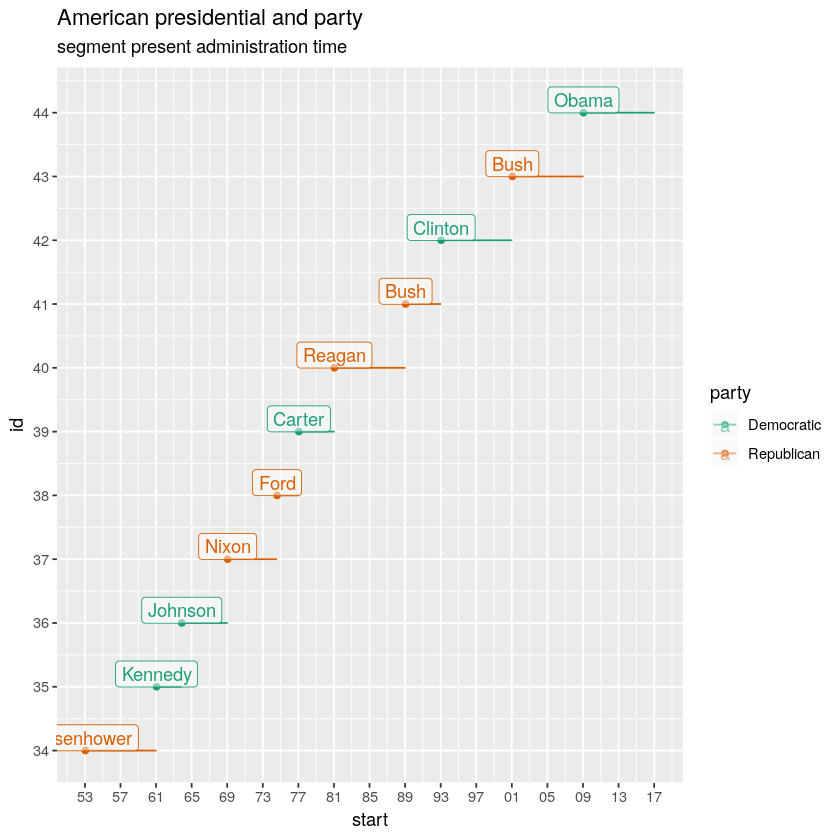

In [31]:
# 修改presidential图形的显示
library(scales)
presidential %>%
    mutate(id =33+row_number()) %>%
    ggplot(aes(start, id, color = party)) +
        geom_point() +
        geom_segment(aes(xend = end, yend = id)) +
        labs(
            title = "American presidential and party",
            subtitle = "segment present administration time")+
#         geom_text(aes(label =  name))+# 加文本不如下面的函数
        geom_label(
            aes(label = name),
            nudge_y = 0.2,
            alpha = 0.5
        )+
#         scale_colour_manual(       
#             values =c(Republican ="red", Democratic ="blue")# 手动指定颜色
#         )# 手动指定颜色
# viridis::scale_fill_viridis() 
scale_color_brewer(palette = "Dark2")+
scale_x_date(breaks=date_breaks("4 years"),labels=date_format('%y'))+# library(scales)
# scale_x_date(
#     NULL,
#     breaks = presidential$start,
#     date_labels = "%y")+
scale_y_continuous(breaks = seq(33,45, by = 1))


## 缩放

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


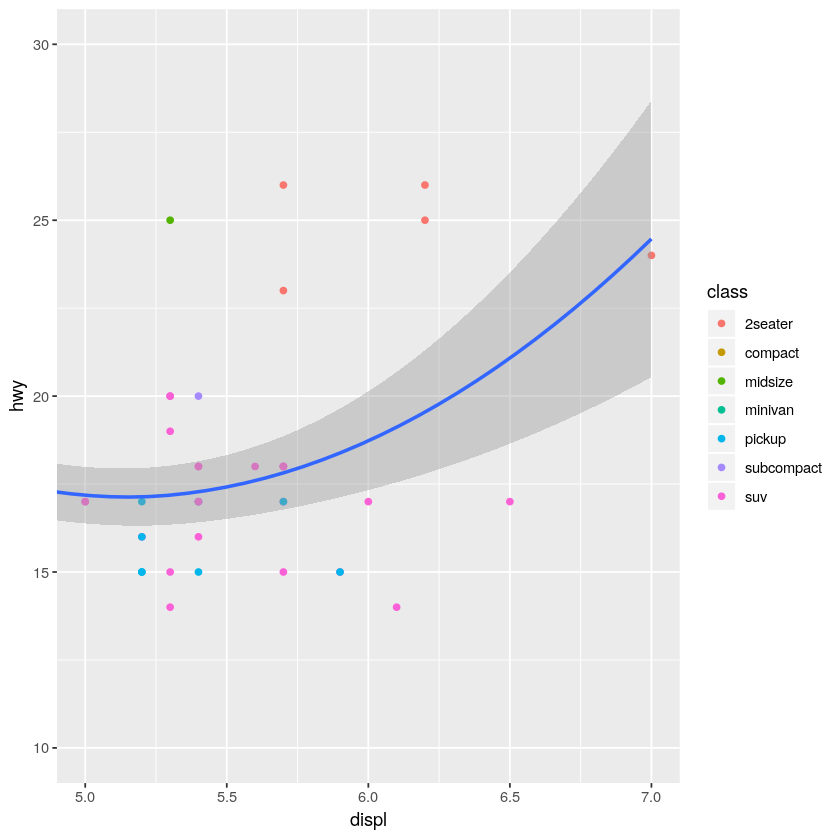

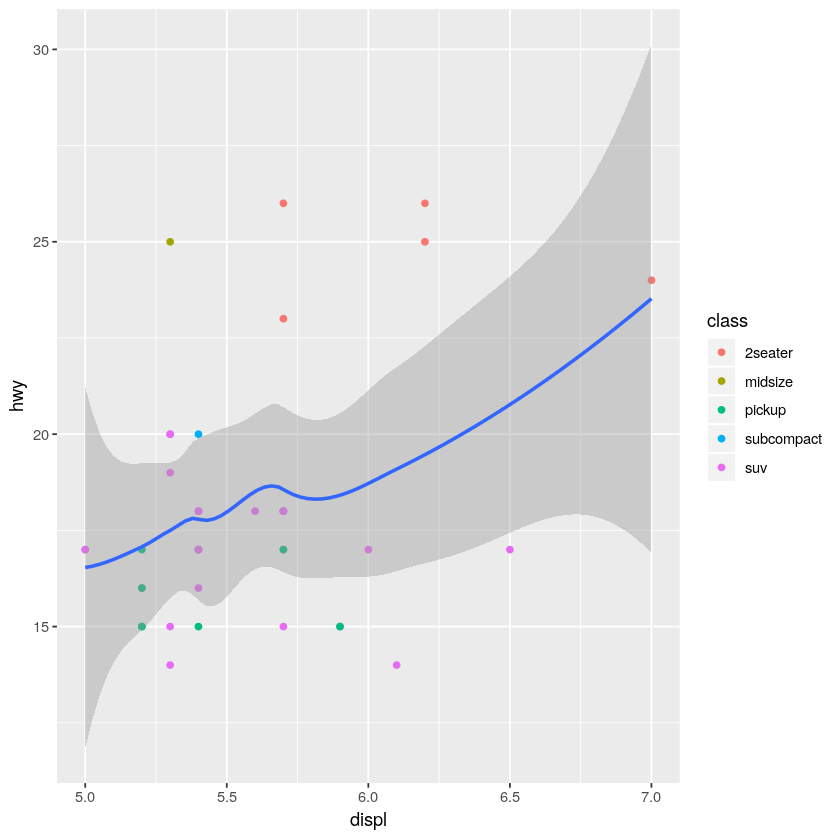

In [32]:
ggplot(mpg, mapping =aes(displ, hwy)) +
geom_point(aes(color = class)) +
geom_smooth() +
coord_cartesian(xlim =c(5, 7), ylim =c(10, 30)) 
# 明显使用coord_cartesian()函数更好
mpg %>%filter(displ >=5, displ <=7, hwy >=10, hwy <=30) %>%# 调整绘图数据
ggplot(aes(displ, hwy)) +
geom_point(aes(color = class)) +geom_smooth()

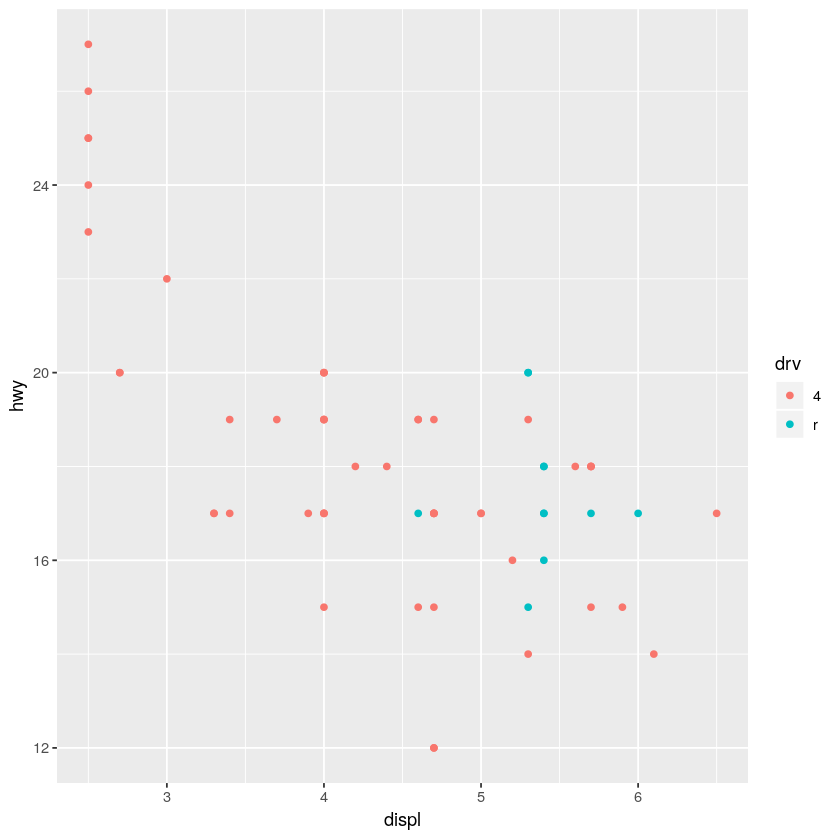

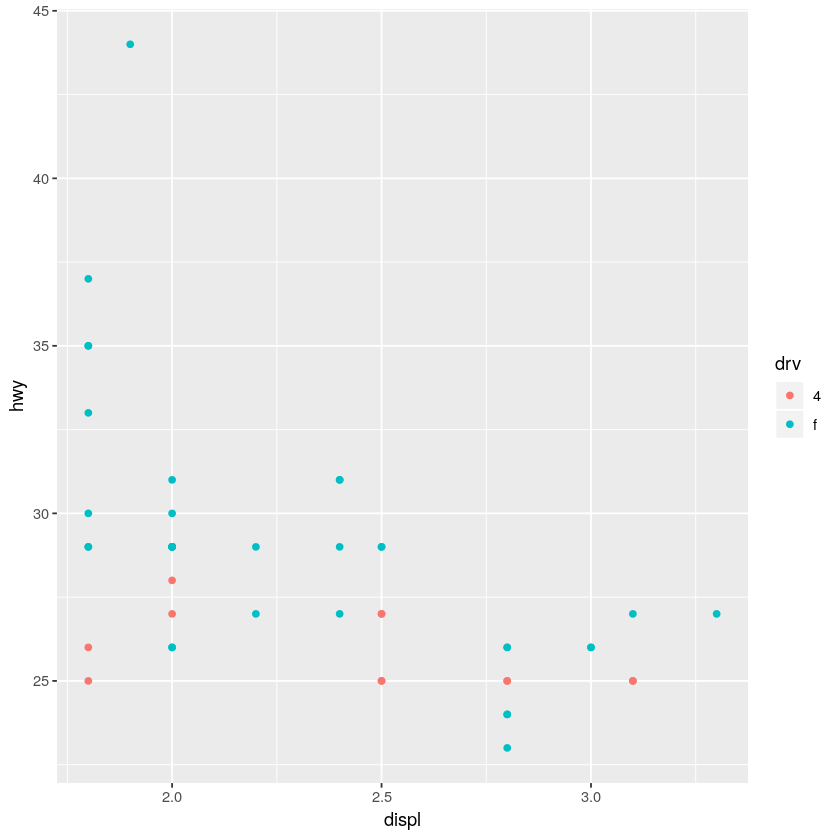

In [33]:
suv <- mpg %>%filter(class =="suv") 
compact <- mpg %>%filter(class =="compact") 
ggplot(suv, aes(displ, hwy, color = drv)) +
    geom_point() 
ggplot(compact, aes(displ, hwy, color = drv)) +
    geom_point()
# 两幅图范围和颜色属性不一样

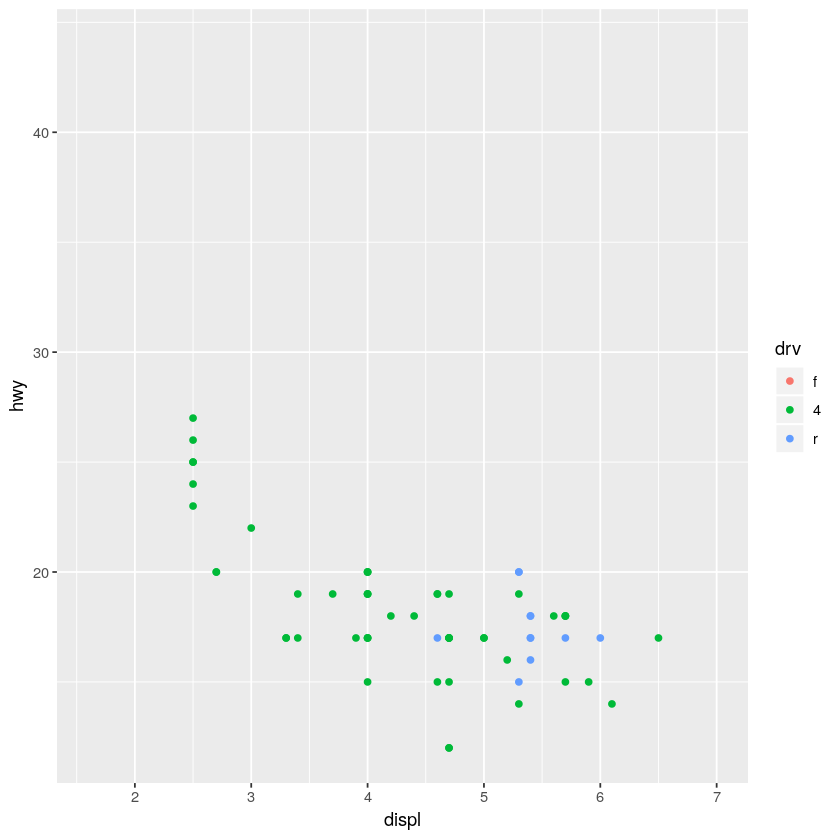

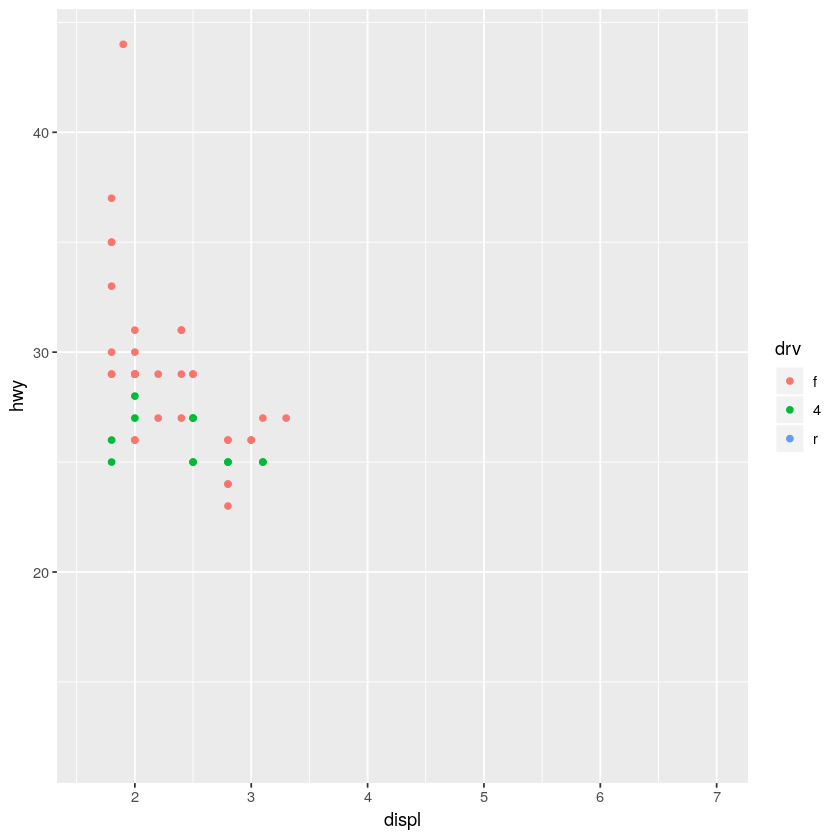

In [34]:
# 使用全局标度
x_scale <-scale_x_continuous(limits =range(mpg$displ)) 
y_scale <-scale_y_continuous(limits =range(mpg$hwy))
col_scale <-scale_color_discrete(limits =unique(mpg$drv)) 
ggplot(suv, aes(displ, hwy, color = drv)) +
    geom_point() +  
    x_scale +  
    y_scale +  
    col_scale 

ggplot(compact, aes(displ, hwy, color = drv)) +
    geom_point() +  
    x_scale +  
    y_scale +  
    col_scale

## 主题

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


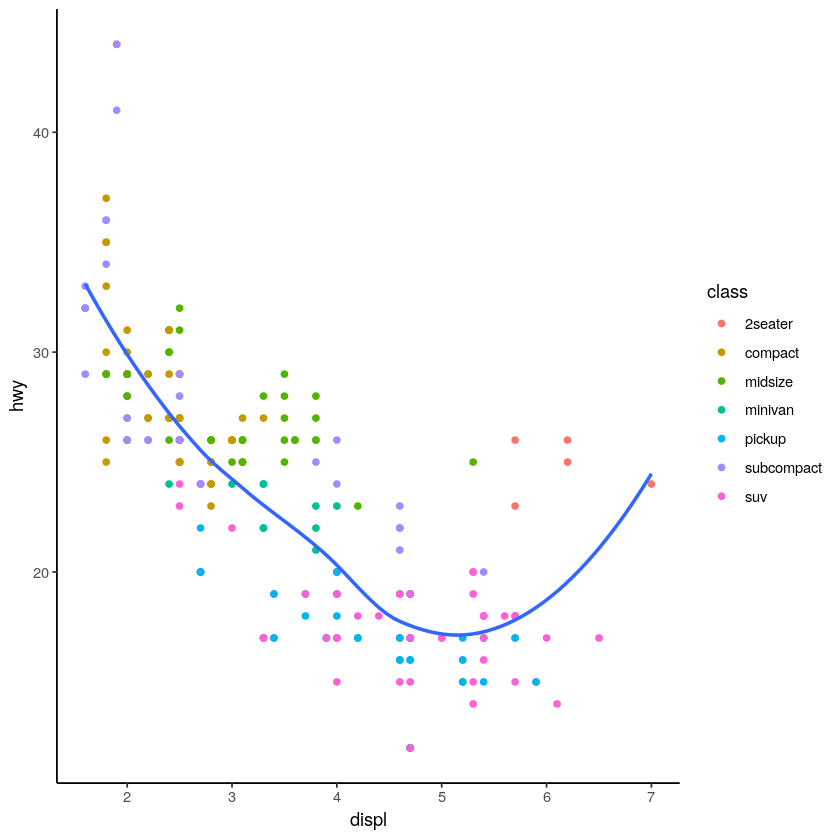

In [35]:
ggplot(mpg, aes(displ, hwy)) +
    geom_point(aes(color = class)) +
    geom_smooth(se =FALSE) +
#     theme_bw()#　可以试用不同的主题
    theme_classic()
# 定制主题需要花时间

Saving 6.67 x 6.67 in image


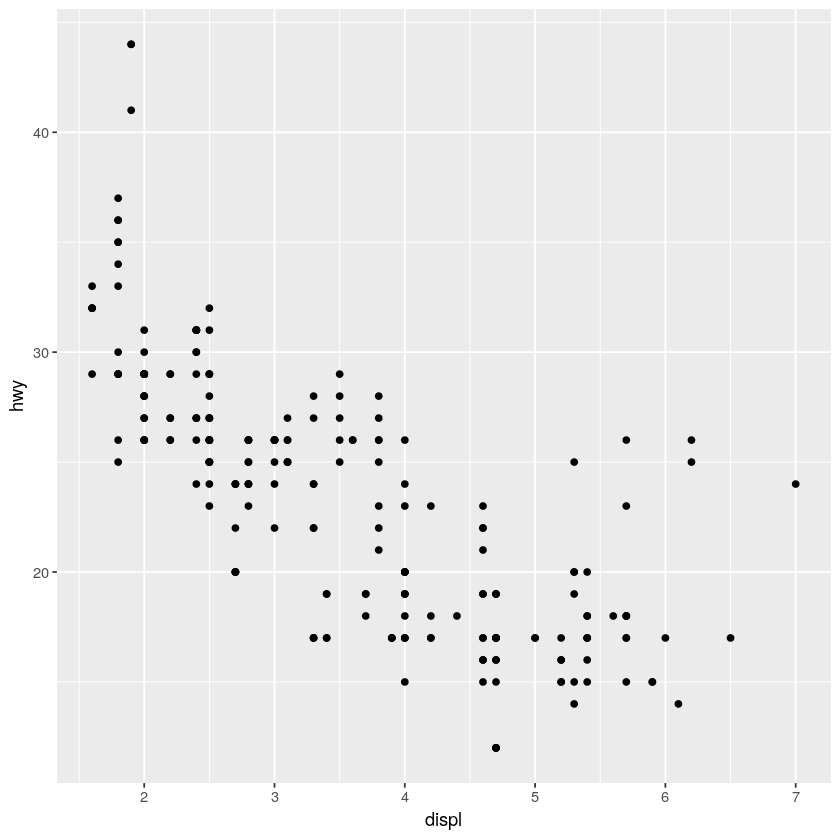

In [36]:
# 保存图像
ggplot(mpg, aes(displ, hwy)) +geom_point()
ggsave("My-plot.pdf")